# Step 1: Importing the libraries



In [86]:
# Importing Libraries & Files for logistic regression and linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import precision_score, recall_score, precision_recall_curve

from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
import warnings
warnings.filterwarnings('ignore')

# Reading datasets from the csv files


In [88]:
# Read data from file
data = pd.read_csv(r"C:\Users\sonjo\OneDrive\Desktop\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

# Step 2: Inspecting the Dataframe

In [89]:
## Observing the first couple of rows
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [90]:
## Checking the shape of the data frame that is finding the number of rows and columns.
data.shape

(9240, 37)

In [91]:
## Finding the information of the dataset like the null values and the datatypes of all the attributes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [92]:
## From the above analysis we can say that there are attributes which have null values as well.

In [93]:
## Using the describe function to find out details of the numerical datas.
data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# Step 3: Data Preparation

In [94]:
#Treat categorical data

categorical_column = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                      'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                      'Get updates on DM Content','Lead Profile','City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity','Tags']
data[categorical_column]

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

                Last Activity       Country             Specialization  \
0     Page Visited on Website           NaN                     Select   
1                Email Opened         India                     Select   
2                Email Opened         India    Business Administration   
3                 Unreachable         India      Media and Advertising   
4           Converted to Lead         India                     Select   
...                       ...           ...                        ...   
9235        Email Marked Spam  Saudi Arabia     IT Projects Management   
9236                 SMS Sent         India      Media and Advertising   
9237                 SMS Sent         India    Business Administration   
9238                 SMS Sent         India  Human Resource Management   
9239                 SMS Sent    Bangladesh    Supply Chain Management   

     How did you hear about X Education What is your current occupation  \
0                                Select                      Unemployed   
1                                Select                      Unemployed   
2                                Select                         Student   
3                         Word Of Mouth                      Unemployed   
4                                 Other                      Unemployed   
...                                 ...                             ...   
9235                             Select                      Unemployed   
9236                             Select                      Unemployed   
9237                             Select                      Unemployed   
9238                      Online Search                             NaN   
9239                             Select                      Unemployed   

     What matters most to you in choosing a course  ...  \
0                          Better Career Prospects  ...   
1                          Better Career Prospects  ...   
2                          Better Career Prospects  ...   
3                          Better Career Prospects  ...   
4                          Better Career Prospects  ...   
...                                            ...  ...   
9235                       Better Career Prospects  ...   
9236                       Better Career Prospects  ...   
9237                       Better Career Prospects  ...   
9238                                           NaN  ...   
9239                       Better Career Prospects  ...   

     Through Recommendations Receive More Updates About Our Courses  \
0                         No                                     No   
1                         No                                     No   
2                         No                                     No   
3                         No                                     No   
4                         No                                     No   
...                      ...                                    ...   
9235                      No                                     No   
9236                      No                                  

In [95]:
## We had previously observed above in the dataset that there are quite a few attributes with 'Select' as the value stored. 
## The reason behind the 'Select' value in the attribute suggests that the Contacted people or customers did not mention any information there. 
## The values mentioning 'Select' is similar to a NULL value.

In [96]:
#Replace select in categorical columns:
data = data.replace({'Select':np.nan}) 

In [97]:
#Printing the categorical attribute to analyze the data.
data[categorical_column]

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

                Last Activity       Country             Specialization  \
0     Page Visited on Website           NaN                        NaN   
1                Email Opened         India                        NaN   
2                Email Opened         India    Business Administration   
3                 Unreachable         India      Media and Advertising   
4           Converted to Lead         India                        NaN   
...                       ...           ...                        ...   
9235        Email Marked Spam  Saudi Arabia     IT Projects Management   
9236                 SMS Sent         India      Media and Advertising   
9237                 SMS Sent         India    Business Administration   
9238                 SMS Sent         India  Human Resource Management   
9239                 SMS Sent    Bangladesh    Supply Chain Management   

     How did you hear about X Education What is your current occupation  \
0                                   NaN                      Unemployed   
1                                   NaN                      Unemployed   
2                                   NaN                         Student   
3                         Word Of Mouth                      Unemployed   
4                                 Other                      Unemployed   
...                                 ...                             ...   
9235                                NaN                      Unemployed   
9236                                NaN                      Unemployed   
9237                                NaN                      Unemployed   
9238                      Online Search                             NaN   
9239                                NaN                      Unemployed   

     What matters most to you in choosing a course  ...  \
0                          Better Career Prospects  ...   
1                          Better Career Prospects  ...   
2                          Better Career Prospects  ...   
3                          Better Career Prospects  ...   
4                          Better Career Prospects  ...   
...                                            ...  ...   
9235                       Better Career Prospects  ...   
9236                       Better Career Prospects  ...   
9237                       Better Career Prospects  ...   
9238                                           NaN  ...   
9239                       Better Career Prospects  ...   

     Through Recommendations Receive More Updates About Our Courses  \
0                         No                                     No   
1                         No                                     No   
2                         No                                     No   
3                         No                                     No   
4                         No                                     No   
...                      ...                                    ...   
9235                      No                                     No   
9236                      No                                  

In [98]:
#Checking the categorical columns to see the skewwwing on various attributes.
remove_columns =[]
for column in categorical_column:
    if max(data[column].value_counts(normalize=True) * 100) >  90:
        remove_columns.append(column)
        print('{0} is skewed towards one value by {1} percent'.format(column,max(data[column].value_counts(normalize=True) * 100)))
    
## Do Not Email, Do Not Call, Country, Search, Magazine,  What matters, newspaper article, X education, newspaper,digital adventisement,  Through recommendations
## Receieve more updates, Update me, Get Updates, I agree  - have skewed data towards one value, hence removing these columns

remove_columns

Do Not Email is skewed towards one value by 92.05627705627705 percent
Do Not Call is skewed towards one value by 99.97835497835497 percent
Country is skewed towards one value by 95.76633721787874 percent
What matters most to you in choosing a course is skewed towards one value by 99.95406522737711 percent
Search is skewed towards one value by 99.84848484848486 percent
Magazine is skewed towards one value by 100.0 percent
Newspaper Article is skewed towards one value by 99.97835497835497 percent
X Education Forums is skewed towards one value by 99.9891774891775 percent
Newspaper is skewed towards one value by 99.9891774891775 percent
Digital Advertisement is skewed towards one value by 99.95670995670996 percent
Through Recommendations is skewed towards one value by 99.92424242424242 percent
Receive More Updates About Our Courses is skewed towards one value by 100.0 percent
Update me on Supply Chain Content is skewed towards one value by 100.0 percent
Get updates on DM Content is skewed 

['Do Not Email',
 'Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [99]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No             NaN     NaN   
1                        No             NaN     NaN   
2                        No  Potential Lead  Mumbai   
3                        No             NaN  Mumbai   
4                        No             NaN  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [100]:
data_processed = data.drop(remove_columns,axis=1)
data_processed

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source  Converted  TotalVisits  \
0                         API      Olark Chat          0          0.0   
1                         API  Organic Search          0          5.0   
2     Landing Page Submission  Direct Traffic          1          2.0   
3     Landing Page Submission  Direct Traffic          0          1.0   
4     Landing Page Submission          Google          1          2.0   
...                       ...             ...        ...          ...   
9235  Landing Page Submission  Direct Traffic          1          8.0   
9236  Landing Page Submission  Direct Traffic          0          2.0   
9237  Landing Page Submission  Direct Traffic          0          2.0   
9238  Landing Page Submission          Google          1          3.0   
9239  Landing Page Submission  Direct Traffic          1          6.0   

      Total Time Spent on Website  Page Views Per Visit  \
0                               0                  0.00   
1                             674                  2.50   
2                            1532                  2.00   
3                             305                  1.00   
4                            1428                  1.00   
...                           ...                   ...   
9235                         1845                  2.67   
9236                          238                  2.00   
9237                          199                  2.00   
9238                          499                  3.00   
9239                         1279                  3.00   

                Last Activity             Specialization  ...  \
0     Page Visited on Website                        NaN  ...   
1                Email Opened                        NaN  ...   
2                Email Opened    Business Administration  ...   
3                 Unreachable      Media and Advertising  ...   
4           Converted to Lead                        NaN  ...   
...                       ...                        ...  ...   
9235        Email Marked Spam     IT Projects Management  ...   
9236                 SMS Sent      Media and Advertising  ...   
9237                 SMS Sent    Business Administration  ...   
9238                 SMS Sent  Human Resource Management  ...   
9239                 SMS Sent    Supply Chain Management  ...   

                                     Tags       Lead Quality    Lead Profile  \
0             Interested in other courses   Low in Relevance             NaN   
1                                 Ringing                NaN             NaN   
2     Will revert after reading the email           Might be  Potential Lead   
3                                 Ringing           Not Sure             NaN   
4     Will revert after reading the email           Might be             NaN   
...                                   ...                ...             ...   
9235  Will revert after reading the email  High in Relevance  Potential Lead   
9236                   wrong number given           Might be  Potential Lead   
9237                       invalid number           Not Sure  Potential Lead   
9238                                  NaN                NaN             NaN   
9239  Will revert after reading the email           Might be  Potential Lea

In [101]:
## Analyzing the null percentages of the attributes in the dataframe.
nullpercentage = round(100*(data_processed.isnull().sum()/len(data_processed.index)),2)
nullpercentage.sort_values(ascending=False) 

How did you hear about X Education        78.46
Lead Profile                              74.19
Lead Quality                              51.59
Asymmetrique Activity Index               45.65
Asymmetrique Profile Score                45.65
Asymmetrique Activity Score               45.65
Asymmetrique Profile Index                45.65
City                                      39.71
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
A free copy of Mastering The Interview     0.00
Prospect ID                                0.00
Lead Number                                0.00
Total Time Spent on Website                0.00
Converted                                  0.00
Lead Origin                             

In [102]:
# Delete columns with high null percent > 40% as these are hard to impute.
data_processed = data_processed.drop(nullpercentage[nullpercentage > 40].index,axis=1)
data_processed.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0          0.0                            0   
1  Organic Search          0          5.0                          674   
2  Direct Traffic          1          2.0                         1532   
3  Direct Traffic          0          1.0                          305   
4          Google          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                      NaN   
1                   2.5             Email Opened                      NaN   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                      NaN   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City A free copy of Mastering The Interview Last Notable Activity  
0     NaN                                     No              Modified  
1     NaN                                     No          Email Opened  
2  Mumbai                                    Yes          Email Opened  
3  Mumbai                                     No              Modified  
4  Mumbai                                     No              Modified

In [103]:
categorical_column = list((set(categorical_column) - set(remove_columns)) - set(nullpercentage[nullpercentage > 40].index))
categorical_column

['Specialization',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'Last Activity',
 'What is your current occupation',
 'Tags',
 'City',
 'Lead Origin',
 'Lead Source']

In [104]:
## Identifying categorical features with large number of values
values_count = {}
for column in categorical_column:
    values_count[column] = len(data_processed[column].value_counts())
values_count

{'Specialization': 18,
 'A free copy of Mastering The Interview': 2,
 'Last Notable Activity': 16,
 'Last Activity': 17,
 'What is your current occupation': 6,
 'Tags': 26,
 'City': 6,
 'Lead Origin': 5,
 'Lead Source': 21}

In [105]:
discard_values = data_processed[['Lead Source']].value_counts(normalize=True) 
data_processed['Lead Source'] = data_processed['Lead Source'].replace(discard_values[discard_values < .05].index,'Others')
data_processed[['Lead Source']].value_counts(normalize=True)

Lead Source   
Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.038027
dtype: float64

In [106]:
discard_values = data_processed[['Specialization']].value_counts(normalize=True) 
data_processed['Specialization'].replace(discard_values[discard_values < .04].index,'Others')
data_processed['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [107]:
discard_values = data_processed[['Last Activity']].value_counts(normalize=True)
data_processed['Last Activity'] = data_processed['Last Activity'].replace(discard_values[discard_values < .02].index,'Others')
data_processed['Last Activity'].value_counts(normalize=True) 

Email Opened               0.376163
SMS Sent                   0.300427
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Converted to Lead          0.046843
Email Bounced              0.035679
Others                     0.035132
Email Link Clicked         0.029222
Name: Last Activity, dtype: float64

In [108]:
## Dropping Last Notable Activity column
data_processed = data_processed.drop('Last Notable Activity', axis=1)
data_processed.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0          0.0                            0   
1  Organic Search          0          5.0                          674   
2  Direct Traffic          1          2.0                         1532   
3  Direct Traffic          0          1.0                          305   
4          Google          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                      NaN   
1                   2.5             Email Opened                      NaN   
2                   2.0             Email Opened  Business Administration   
3                   1.0                   Others    Media and Advertising   
4                   1.0        Converted to Lead                      NaN   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City A free copy of Mastering The Interview  
0     NaN                                     No  
1     NaN                                     No  
2  Mumbai                                    Yes  
3  Mumbai                                     No  
4  Mumbai                                     No

In [109]:
## Removing the attribute "Last Notable Activity"
categorical_column.remove('Last Notable Activity')

In [110]:
## Chhecking the conversion rate for past order
round(len(data[data['Converted']==1].index)/len(data.index)*100,2)

38.54

In [111]:
## Displaying the new set of attributes in the Dataset.
data_processed.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview'],
      dtype='object')

In [112]:
## Analyzing the null percentages of the attributes in the dataframe.
nullpercentage = round(100*(data_processed.isnull().sum()/len(data_processed.index)),2)
nullpercentage.sort_values(ascending=False) 

City                                      39.71
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
dtype: float64

In [113]:
## Dropping rows with most NaN value (Taking an arbitrary value >20 %)
threshold = int(.2*len(data_processed.columns))
data_2 = data_processed.dropna(thresh=threshold)
len(data_2.index),len(data_processed.index)

## There are none, most rows contain 60% feature data atleast

(9240, 9240)

In [114]:
## De-duplication data set by all columns of the rows.
data_processed=data_processed.drop_duplicates()  
data_processed.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0          0.0                            0   
1  Organic Search          0          5.0                          674   
2  Direct Traffic          1          2.0                         1532   
3  Direct Traffic          0          1.0                          305   
4          Google          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                      NaN   
1                   2.5             Email Opened                      NaN   
2                   2.0             Email Opened  Business Administration   
3                   1.0                   Others    Media and Advertising   
4                   1.0        Converted to Lead                      NaN   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City A free copy of Mastering The Interview  
0     NaN                                     No  
1     NaN                                     No  
2  Mumbai                                    Yes  
3  Mumbai                                     No  
4  Mumbai                                     No

In [115]:
## Analyzing the null percentages of the attributes in the dataframe.
nullpercentage = round(100*(data_processed.isnull().sum()/len(data_processed.index)),2)
nullpercentage.sort_values(ascending=False) 

City                                      39.71
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
dtype: float64

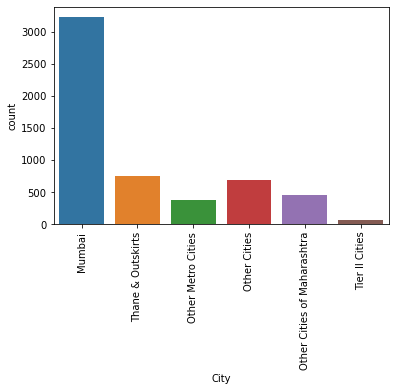

In [116]:
## Distribution of the attribute City using count plot.
sns.countplot(data_processed['City'])
plt.xticks(rotation=90)
plt.show()

In [117]:
## Dropping City since Mumbai has the majority and null percent is preety high.
data_processed.City.value_counts(normalize=True)
data_processed = data_processed.drop('City', axis=1)
categorical_column.remove('City')

In [118]:
## Analyzing the attribute Specialisation and checking the percentage count of all the data's within it.
data_processed.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

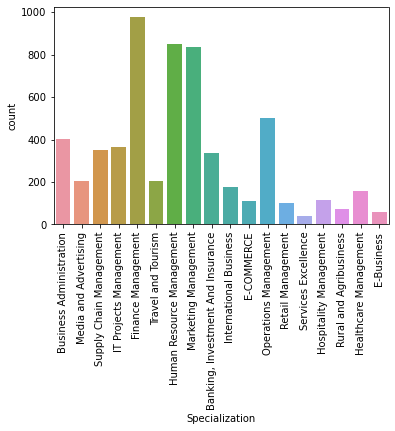

In [119]:
## Distribution of the attribute Specialization using count plot.
sns.countplot(data_processed['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [120]:
## Imputing the missing values with mode for categorical data.
data_processed['Specialization'].fillna('Finance Management',axis=0,inplace=True)
data_processed.Specialization.value_counts(normalize=True)

Finance Management                   0.471429
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [121]:
## Analyzing the attribute Tags and checking the percentage count of all the data's within it.
data_processed.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

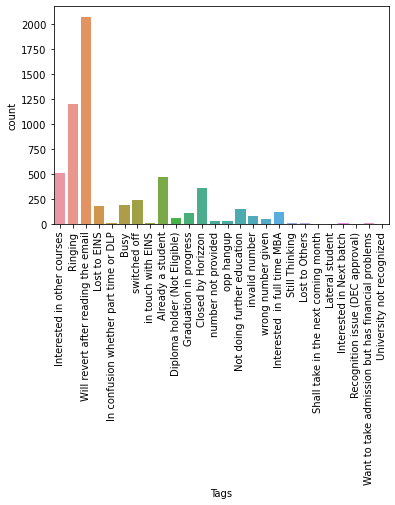

In [122]:
## Distribution of the attribute Tags using count plot.
sns.countplot(data_processed['Tags'])
plt.xticks(rotation=90)
plt.show()

In [123]:
## Imputing the missing values with mode for categorical data 'Tags'.
data_processed['Tags'].fillna('Will revert after reading the email',axis=0,inplace=True)
data_processed.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.587121
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number not provided                                  0.002922
in touch

In [124]:
## Analyzing the attribute 'What is your current occupation' and checking the percentage count of all the data's within it.
data_processed['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

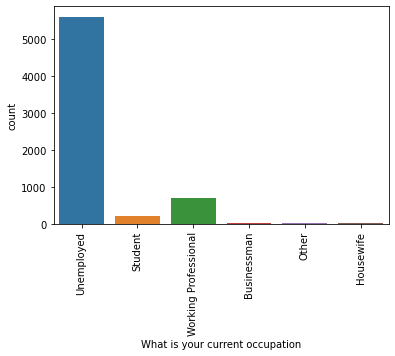

In [125]:
## Distribution of the attribute 'What is your current occupation' using count plot.
sns.countplot(data_processed['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [126]:
## As we can see that the maximum count falls under the data 'Unemployed', we can drop the attribute from our analysis.

## Dropping the attribute "What is your current occupation".
data_processed.drop('What is your current occupation',axis=1,inplace=True)
categorical_column.remove('What is your current occupation')

In [127]:
## Checking the attribute 'Page Views Per Visit'.
data_processed['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

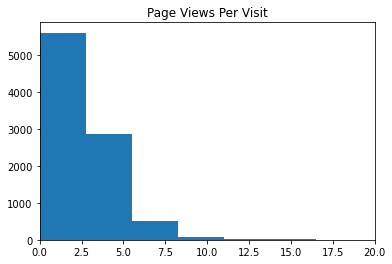

In [128]:
## Distribution of 'Page Views Per Visit' using histogram.
plt.hist(data_processed['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show( )      

In [129]:
## As per above analysis we will replace the null value with the mean value from the attribute 'Page Views Per Visit'.
data_processed[['Page Views Per Visit']]=data_processed[['Page Views Per Visit']].fillna(value=data_processed[['Page Views Per Visit']].mean())

In [130]:
## Checking the attribute 'TotalVisits'.
data_processed['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

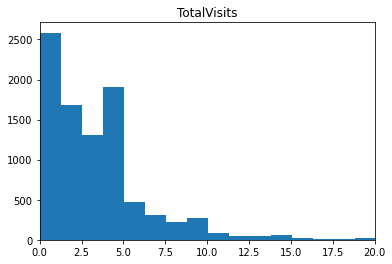

In [131]:
## Distribution of 'TotalVisits' using histogram.
plt.hist(data_processed['TotalVisits'], bins = 200)
plt.title('TotalVisits')
plt.xlim(0,20)
plt.show( )    

In [132]:
## As per above analysis we will replace the null value with the mean value from the attribute 'TotalVisits'.
data_processed[['TotalVisits']]=data_processed[['TotalVisits']].fillna(value=data_processed[['TotalVisits']].mean())

In [133]:
## Checking the attribute 'Last Activity'.
data_processed['Last Activity'].describe()

count             9137
unique               8
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

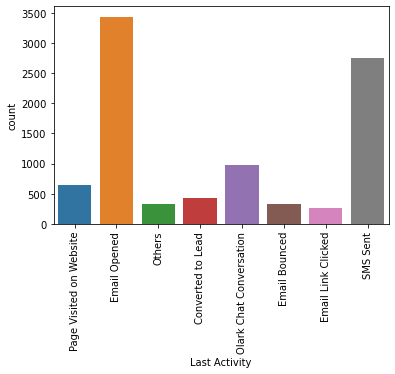

In [134]:
## Distribution of the attribute 'Last Activity' using count plot.
sns.countplot(data_processed['Last Activity'])
plt.xticks(rotation=90)
plt.show()

In [135]:
## As per the above analysis we can see that the Last Activity attribiute has 'Email Opened' with the highest count, so we will be replacing null values with it.
data_processed[['Last Activity']]=data_processed[['Last Activity']].fillna(value='Email Opened')

In [136]:
## Checking the attribute 'Lead Source'.
data_processed['Lead Source'].describe()

count       9204
unique         6
top       Google
freq        2868
Name: Lead Source, dtype: object

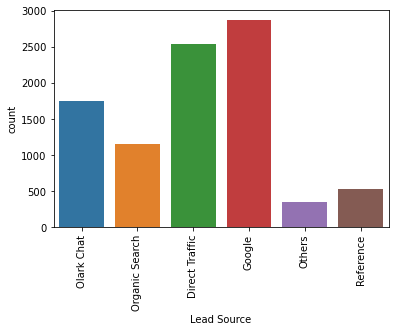

In [137]:
## Distribution of the attribute 'Lead Source' using count plot.
sns.countplot(data_processed['Lead Source'])
plt.xticks(rotation=90)
plt.show()

In [138]:
## As per the above analysis we can see that the Lead Source attribiute has 'Google' with the highest count, so we will be replacing null values with it.
data_processed[['Lead Source']]=data_processed[['Lead Source']].fillna(value='Google')

In [139]:
nullpercentage = round(100*(data_processed.isnull().sum()/len(data_processed.index)),2)
nullpercentage.sort_values(ascending=False) 

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [140]:
#Dropping the number column which is a unique identifier.
data_processed.drop('Prospect ID',axis=1,inplace=True)

In [141]:
data_processed.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Tags', 'A free copy of Mastering The Interview'],
      dtype='object')

# Handling Outliners

In [142]:
## Finding the unique values in each columns.
data_processed.nunique()

Lead Number                               9240
Lead Origin                                  5
Lead Source                                  6
Converted                                    2
TotalVisits                                 42
Total Time Spent on Website               1731
Page Views Per Visit                       115
Last Activity                                8
Specialization                              18
Tags                                        26
A free copy of Mastering The Interview       2
dtype: int64

Text(0.5, 1.0, 'Distribution of the Total Time Spent on Website')

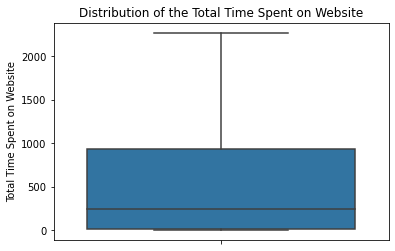

In [143]:
## Analyzing the Distribution of the Total Time Spent on Website using boxplot.
#plt.figure(figsize = [10,6]) 
sns.boxplot(data=data_processed,y='Total Time Spent on Website')
plt.title('Distribution of the Total Time Spent on Website')

### From the above analysis we can see that there are no outliners.


Text(0.5, 1.0, 'Distribution of the total visits')

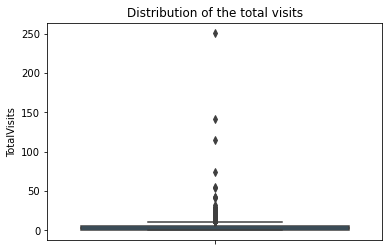

In [144]:
## Analyzing the Distribution of the Total visits using boxplot.
#plt.figure(figsize = [10,6]) 
sns.boxplot(data=data_processed,y='TotalVisits')
plt.title('Distribution of the total visits')

### From the above analysis we can observe that the attribute 'TotalVisits' has quite a few outliners.

Text(0.5, 1.0, 'Distribution of the Page Views Per Visit')

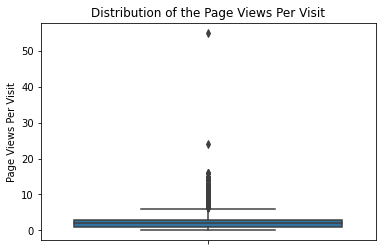

In [145]:
## Analyzing the Distribution of the Page Views Per Visit using boxplot.
#plt.figure(figsize = [10,6]) 
sns.boxplot(data=data_processed,y='Page Views Per Visit')
plt.title('Distribution of the Page Views Per Visit')

### From the above analysis we can observe that the attribute 'Page Views Per Visit' has quite a few outliners.

# EDA

In [146]:
data_processed.nunique()

Lead Number                               9240
Lead Origin                                  5
Lead Source                                  6
Converted                                    2
TotalVisits                                 42
Total Time Spent on Website               1731
Page Views Per Visit                       115
Last Activity                                8
Specialization                              18
Tags                                        26
A free copy of Mastering The Interview       2
dtype: int64

# Univariate Analysis.

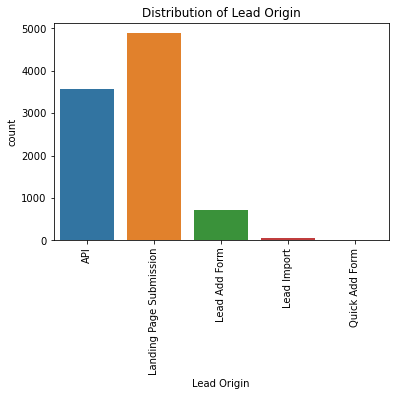

In [147]:
## Analyzing Lead Origin using countplot.
sns.countplot(data_processed['Lead Origin'])
plt.title("Distribution of Lead Origin")
plt.xticks(rotation=90)
plt.show()

### Here we can see that 'Landing Page Submission' has the highest count in Lead Origin.

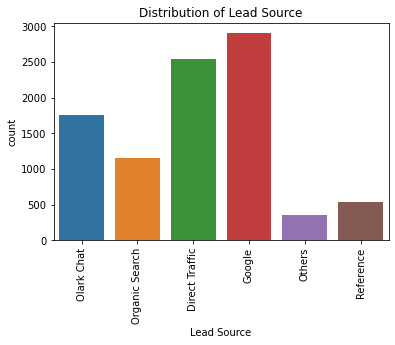

In [148]:
## Analyzing Lead Source using countplot.
sns.countplot(data_processed['Lead Source'])
plt.title("Distribution of Lead Source")
plt.xticks(rotation=90)
plt.show()

### Here we can see that 'Google' has the highest count in Lead Source attribute.

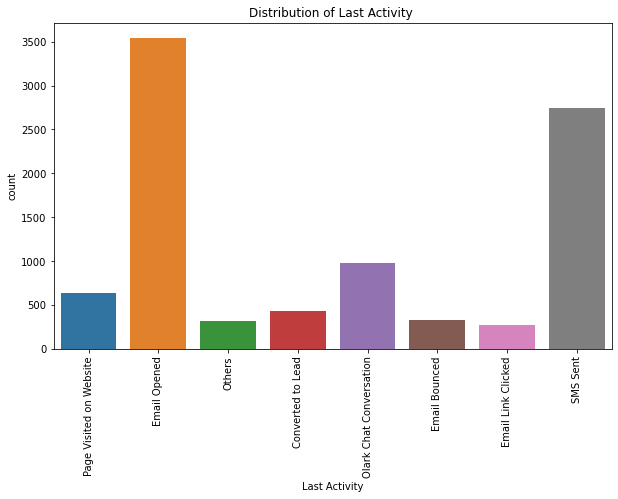

In [149]:
## Analyzing Last Activity  using countplot.
plt.figure(figsize = [10,6])
sns.countplot(data_processed['Last Activity'])
plt.title("Distribution of Last Activity ")
plt.xticks(rotation=90)
plt.show()

### Here we can see that 'Email Opened' has the highest count in Last Activity attribute.
### We can also see that the 'Email Link Clicked' has the lowest count.

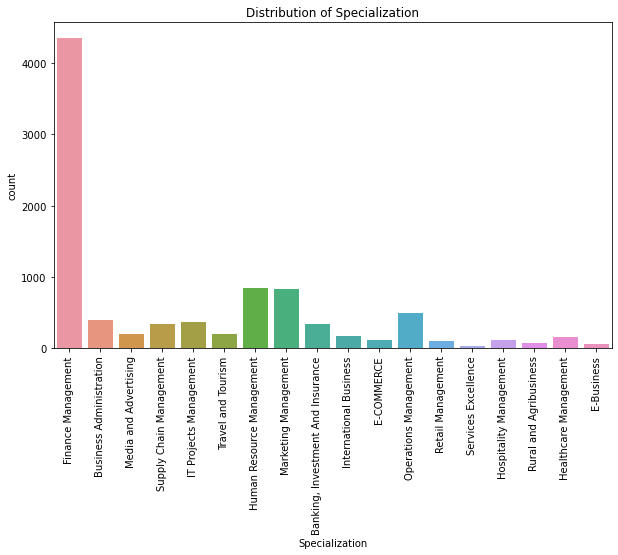

In [150]:
## Analyzing Specialization using countplot.
plt.figure(figsize = [10,6])
sns.countplot(data_processed['Specialization'])
plt.title("Distribution of Specialization")
plt.xticks(rotation=90)
plt.show()

### Here we can see that 'Finance Mangement' has the highest count in Specialization attribute.
### We can also see that the 'Service Excellence' has the lowest count.

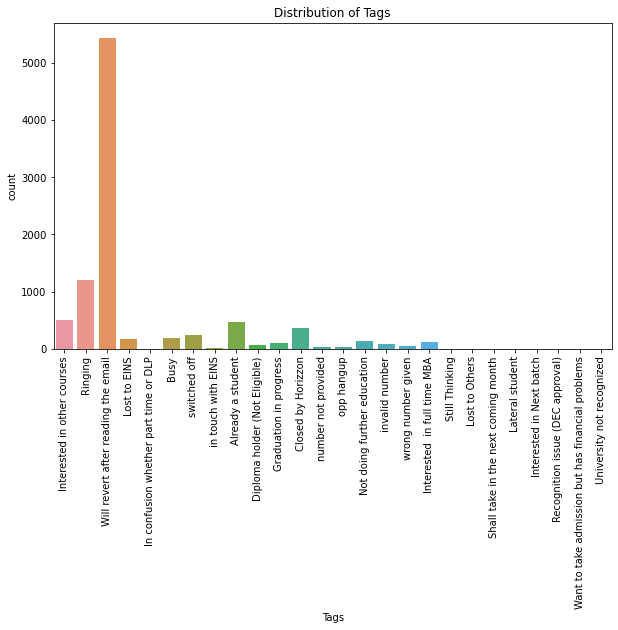

In [151]:
## Analyzing Tags using countplot.
plt.figure(figsize = [10,6])
sns.countplot(data_processed['Tags'])
plt.title("Distribution of Tags")
plt.xticks(rotation=90)
plt.show()

### Here we can see that 'Will revert after reading the email' has the highest count in Tags attribute.

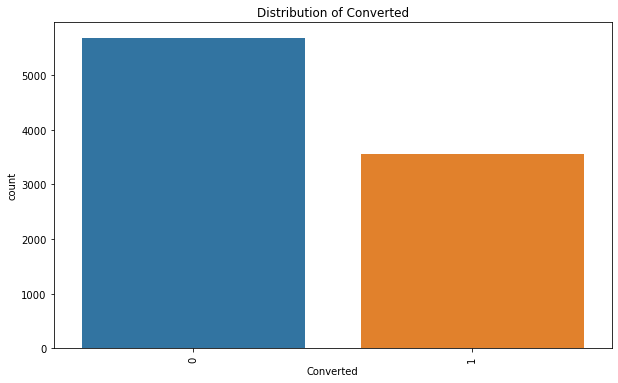

In [152]:
## Analyzing Converted using countplot.
plt.figure(figsize = [10,6])
sns.countplot(data_processed['Converted'])
plt.title("Distribution of Converted")
plt.xticks(rotation=90)
plt.show()

### Here we can see that 0 has the highest count in Converted attribute.


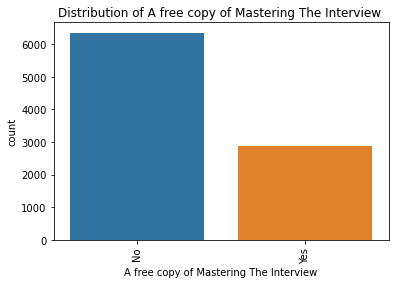

In [155]:
## Analyzing A free copy of Mastering The Interview  using countplot.
sns.countplot(data_processed['A free copy of Mastering The Interview'])
plt.title("Distribution of A free copy of Mastering The Interview ")
plt.xticks(rotation=90)
plt.show()

### Here we can see that 'No' has the highest count in 'A free copy of Mastering The Interview' attribute.

## Bivariate Analysis/ Multivariate Analysis

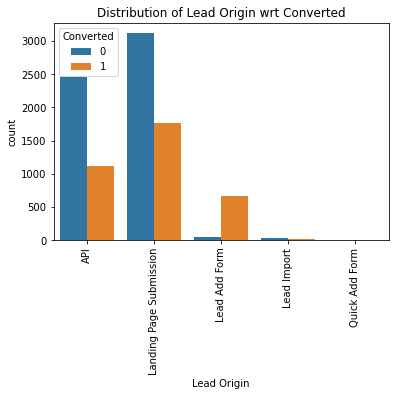

In [156]:
## Distribution of Lead Origin with respect to the Converted attribute using countplot.
sns.countplot(x = "Lead Origin", hue = "Converted", data = data_processed)
plt.title("Distribution of Lead Origin wrt Converted")
plt.xticks(rotation=90)
#plt.legend()
plt.show()

#### The two datas API and Landing Page Submission have moreover a higher conversion rate but the count of lead originated from them are considerable.
#### The Lead Add Form has very high conversion rate, yet the count of lead are not very high.
#### The Lead Import are very less in number and the least compared to all the other values.
#### To improve the lead conversion rate, we need to focus more on improving the lead coversion of API and Landing Page Submission and also generate more number of leads from Lead Add Form.

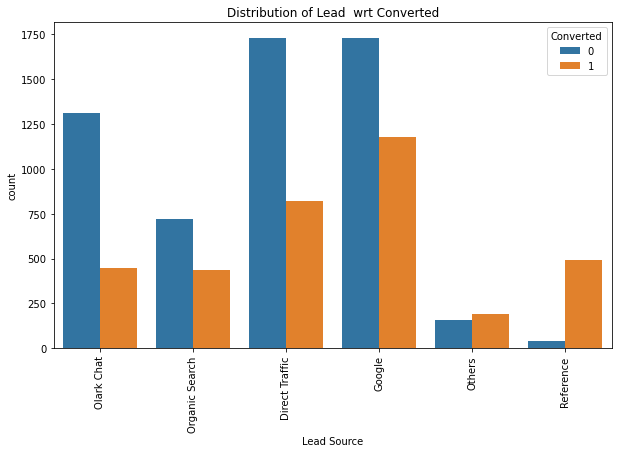

In [157]:
## Distribution of Lead Source with respect to the Converted attribute using countplot.
plt.figure(figsize = [10,6])
sns.countplot(x = "Lead Source", hue = "Converted", data = data_processed)
plt.title("Distribution of Lead  wrt Converted")
plt.xticks(rotation=90)
plt.show()

##### We can see that Google and Direct Traffic generate the most number of leads.
#### We can also observe that the conversion rate of Reference leads and leads through Welingak Website is pretty high.
#### To improve overall lead conversion rate, we need to focus on improving lead converion of Olark chat, Organic Search, Direct Traffic, and Google leads. We can also generate more leads from Reference and Welingak Website leads.

<AxesSubplot:xlabel='TotalVisits'>

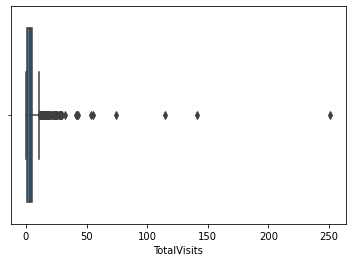

In [158]:
## Distribution of TotalVisits using boxplot.
sns.boxplot(data_processed['TotalVisits'])

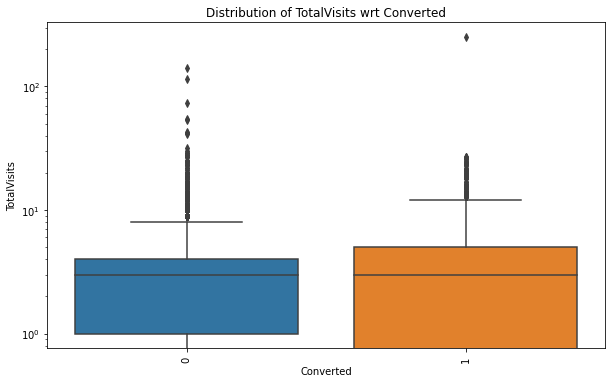

In [159]:
## Distribution of TotalVisits wrt Converted using boxplot.
plt.figure(figsize = [10,6])
plt.yscale('log')
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data_processed)
plt.title("Distribution of TotalVisits wrt Converted")
plt.xticks(rotation=90)
plt.show()

#### From the above analysis we can see that the median for both Converted and not converted are same so we cant predict anything conclusive using the TotalVisits attribute.

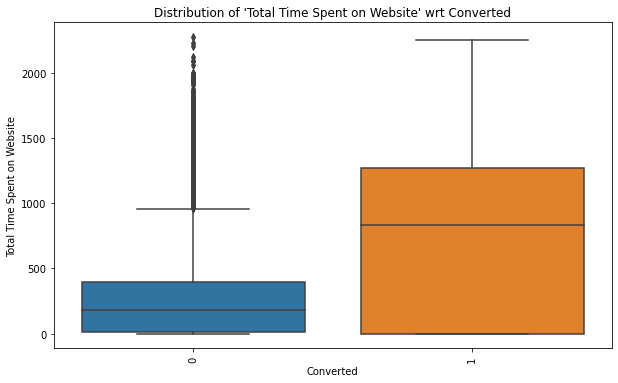

In [160]:
## Distribution of 'Total Time Spent on Website' wrt Converted using boxplot.
plt.figure(figsize = [10,6])
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data_processed)
plt.title("Distribution of 'Total Time Spent on Website' wrt Converted")
plt.xticks(rotation=90)
plt.show()

#### From the above analysis we can see that the more time a lead spends on the website the higher are the conversion rates.

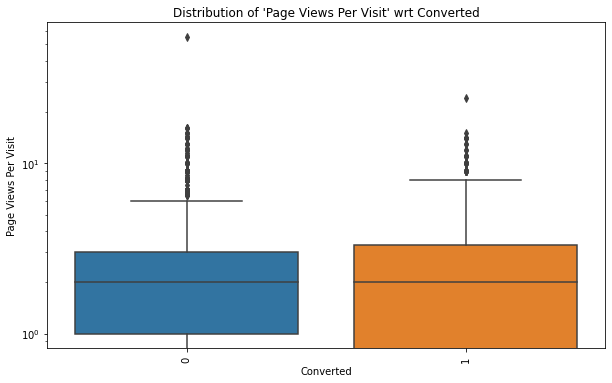

In [161]:
## Distribution of 'Page Views Per Visit' wrt Converted using boxplot.
plt.figure(figsize = [10,6])
plt.yscale('log')
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data_processed)
plt.title("Distribution of 'Page Views Per Visit' wrt Converted")
plt.xticks(rotation=90)
plt.show()

#### From the above analysis we can see that the median for Converted and not converted leads are same hence to predictions can be made.

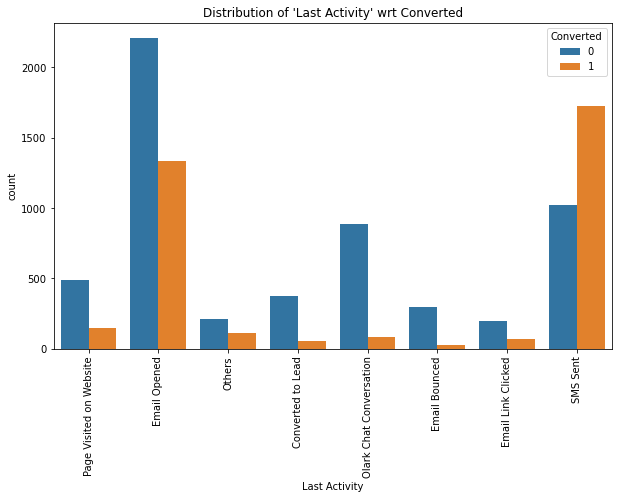

In [162]:
## Distribution of 'Last Activity' wrt Converted using countplot.
plt.figure(figsize = [10,6])
sns.countplot(x = "Last Activity", hue = "Converted", data = data_processed)
plt.title("Distribution of 'Last Activity' wrt Converted")
plt.xticks(rotation=90)
plt.show()

#### We can observe that most of the leads have Email Opened as there last activity.
#### We can also observe that the conversion rate for leads with there last activity is highest in SMS Sent.

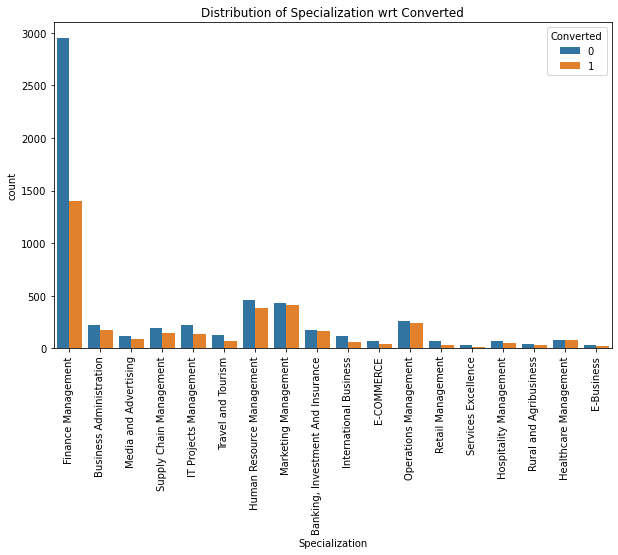

In [163]:
## Distribution of 'Specialization' wrt Converted using countplot.
plt.figure(figsize = [10,6])
sns.countplot(x = "Specialization", hue = "Converted", data = data_processed)
plt.title("Distribution of Specialization wrt Converted")
plt.xticks(rotation=90)
plt.show()

#### From the above analysis we can say that the maximum focus for lead conversion should be at specialization with high conversion rates like Financial Management.
#### The Lowest Conversion of leads can be seen in Service Excellence and E-Business.

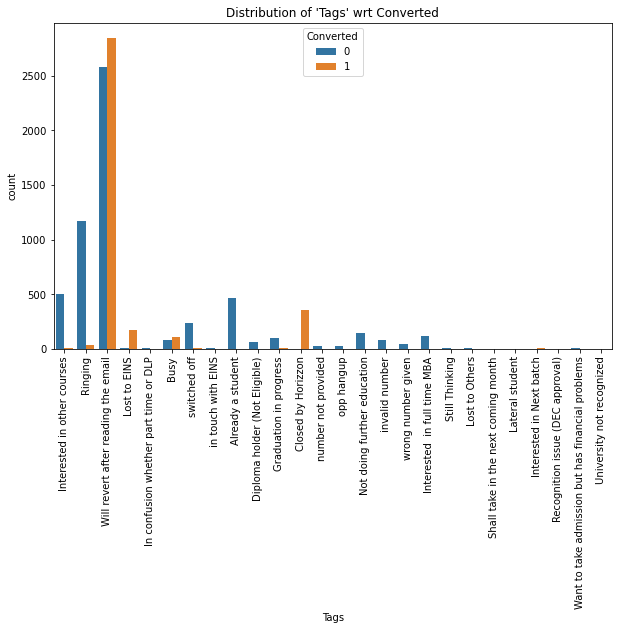

In [164]:
## Distribution of 'Tags' wrt Converted using countplot.
plt.figure(figsize = [10,6])
sns.countplot(x = "Tags", hue = "Converted", data = data_processed)
plt.title("Distribution of 'Tags' wrt Converted")
plt.xticks(rotation=90)
plt.show()

#### We can observe that 'Will revert after reading the email' has highest conversion rate.

<AxesSubplot:>

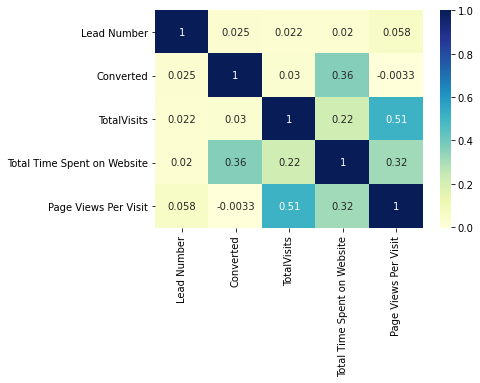

In [165]:
# Visualizing the correlation between all set of usable columns
#plt.figure(figsize = [10,6])
sns.heatmap(data_processed.corr(), cmap="YlGnBu",annot=True)

#### Observation

1. There is low variation in Page Views Per Visit and TotalVisits but higher variation in Total Time Spent on Website.
2. There are outliers in Page Views Per Visit and TotalVisits which won't be treated further since they look legimate.
3. There is positive correlation between Total Time Spent on Website and Conversion
4. There is some correlation between Conversion and some categorical columns like Lead Origin and Lead Source
5. There is almost no correlation in Page Views Per Visit and TotalVisits with Conversion 
6. Median of time spent on website was more for positive conversion.

# Creating Dummies

In [166]:
data_processed[categorical_column].describe()

Specialization A free copy of Mastering The Interview  \
count                 9240                                   9240   
unique                  18                                      2   
top     Finance Management                                     No   
freq                  4356                                   6352   

       Last Activity                                 Tags  \
count           9240                                 9240   
unique             8                                   26   
top     Email Opened  Will revert after reading the email   
freq            3540                                 5425   

                    Lead Origin Lead Source  
count                      9240        9240  
unique                        5           6  
top     Landing Page Submission      Google  
freq                       4886        2904

In [167]:
# Creating dummy variables and drop first column
data_processed = pd.get_dummies(data=data_processed, columns=list(categorical_column), drop_first=True)

In [168]:
data_processed.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page Views Per Visit  Specialization_Business Administration  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Specialization_E-Business  Specialization_E-COMMERCE  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Specialization_Finance Management  Specialization_Healthcare Management  \
0                                  1                                     0   
1                                  1                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  1                                     0   

   ...  Tags_wrong number given  Lead Origin_Landing Page Submission  \
0  ...                        0                                    0   
1  ...                        0                                    0   
2  ...                        0                                    1   
3  ...                        0                                    1   
4  ...                        0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Google  Lead Source_Olark Chat  \
0                           0                   0                       1   
1                           0                   0                       0   
2                           0                   0                       0   
3                           0                   0                       0   
4                           0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  
0                           0                   0                      0  
1                           1                   0                      0  
2                           0                   0                      0  
3                           0                   0                      0  
4                           0                   0                      0  

[5 rows x 64 columns]

In [171]:
data_processed.shape

(9240, 64)

## EDA (II)

<AxesSubplot:>

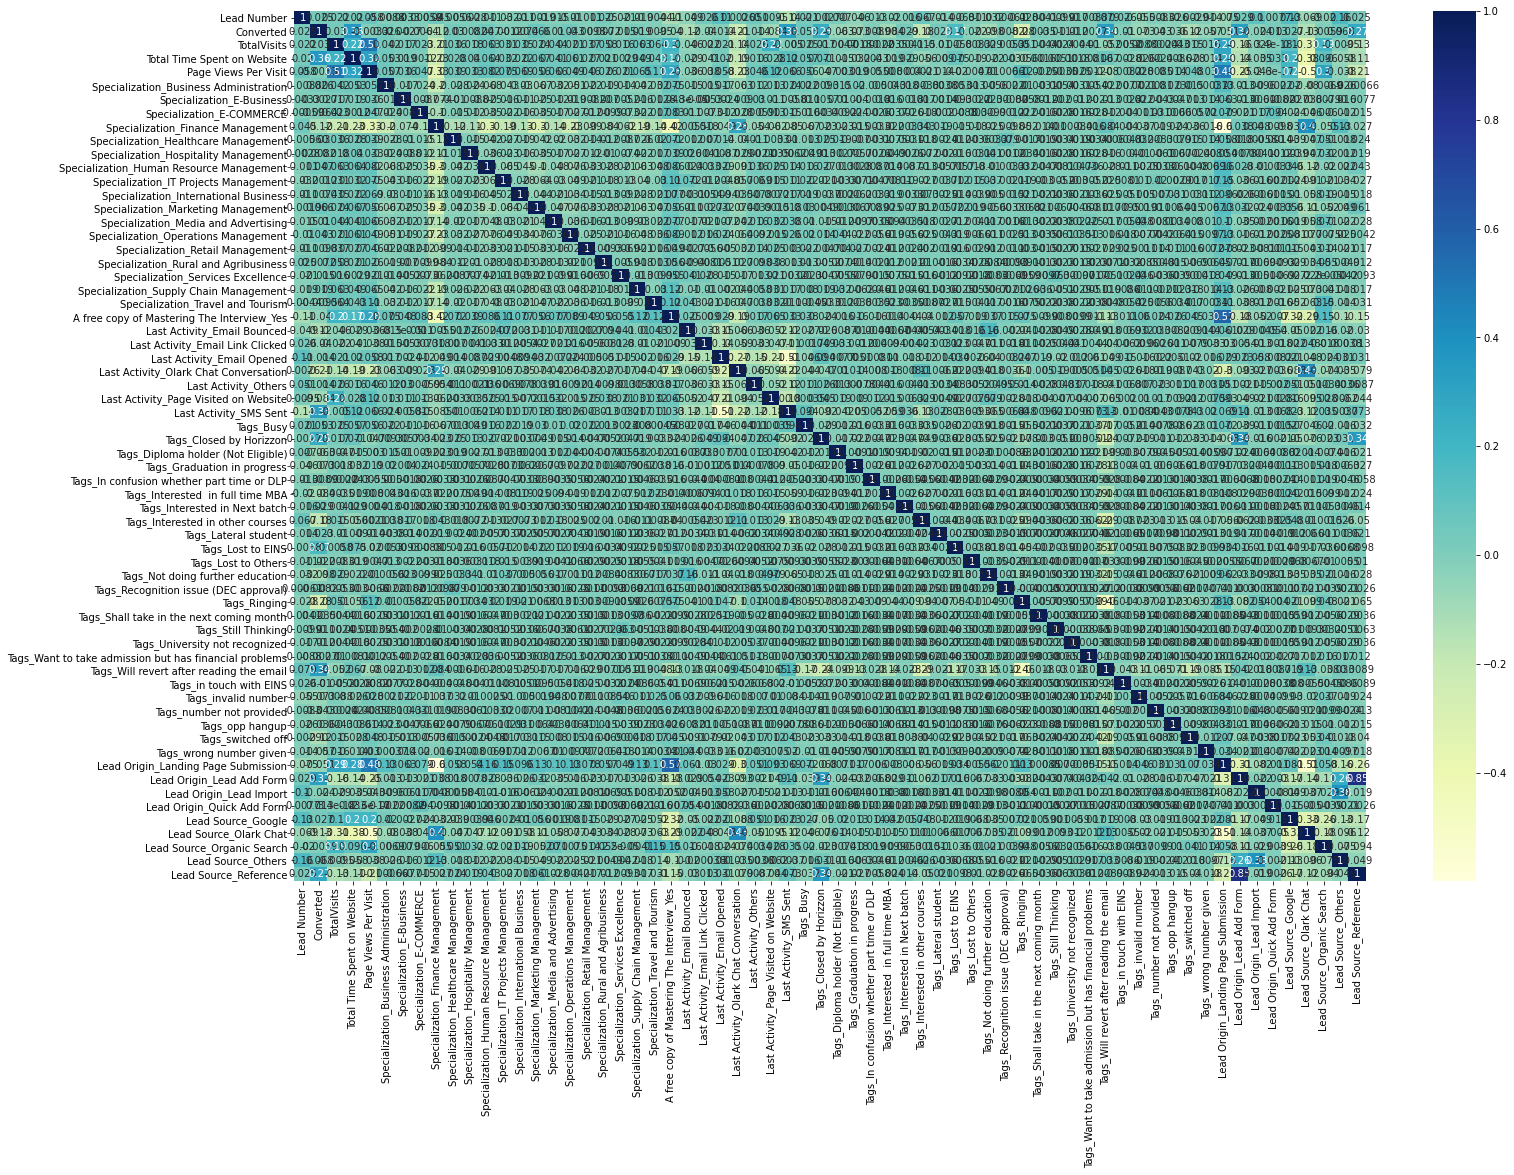

In [172]:
plt.figure(figsize=(24, 16))
sns.heatmap(data_processed.corr(), cmap="YlGnBu",annot=True)

In [173]:
# Categorical segregation after final updates to data frame
categorical_column=[]
numerical_column=[]
for column in data_processed.columns:
    if column.find('_') > -1:
        categorical_column.append(column)
        
categorical_column,numerical_column

(['Specialization_Business Administration',
  'Specialization_E-Business',
  'Specialization_E-COMMERCE',
  'Specialization_Finance Management',
  'Specialization_Healthcare Management',
  'Specialization_Hospitality Management',
  'Specialization_Human Resource Management',
  'Specialization_IT Projects Management',
  'Specialization_International Business',
  'Specialization_Marketing Management',
  'Specialization_Media and Advertising',
  'Specialization_Operations Management',
  'Specialization_Retail Management',
  'Specialization_Rural and Agribusiness',
  'Specialization_Services Excellence',
  'Specialization_Supply Chain Management',
  'Specialization_Travel and Tourism',
  'A free copy of Mastering The Interview_Yes',
  'Last Activity_Email Bounced',
  'Last Activity_Email Link Clicked',
  'Last Activity_Email Opened',
  'Last Activity_Olark Chat Conversation',
  'Last Activity_Others',
  'Last Activity_Page Visited on Website',
  'Last Activity_SMS Sent',
  'Tags_Busy',
  '

In [174]:
def cat_univariate_analysis(c):
    sns.catplot(y=c, data=data_processed, kind="count")
    plt.show()

In [175]:
def cat_bivariate_analysis(c1,c2):
    sns.catplot(col=c1 ,y=c2, data=data_processed, kind="count")
    plt.show()

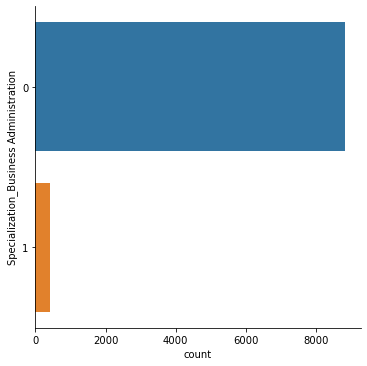

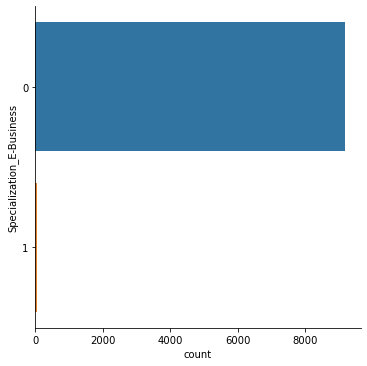

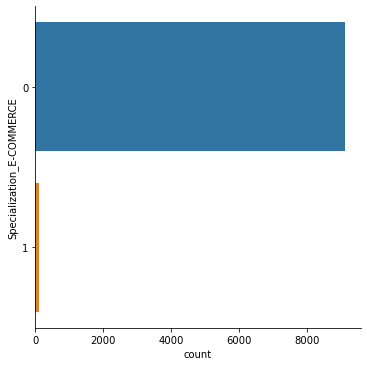

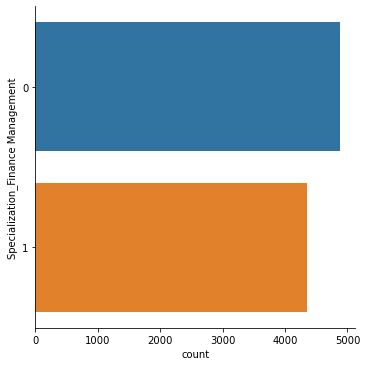

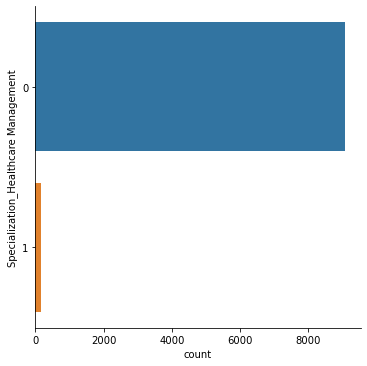

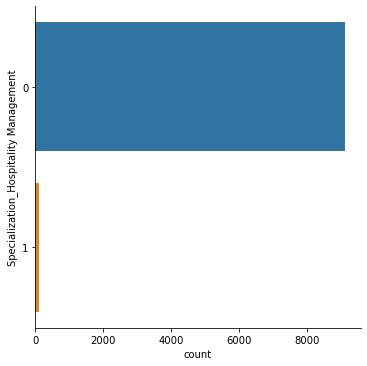

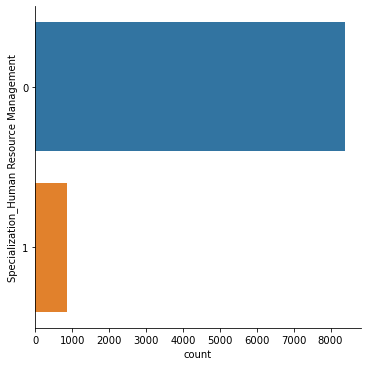

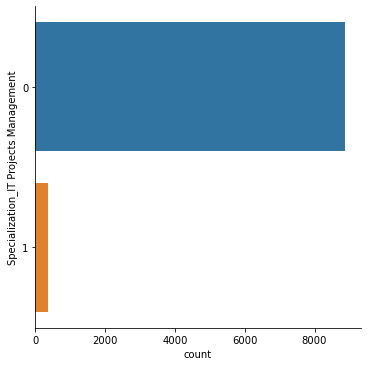

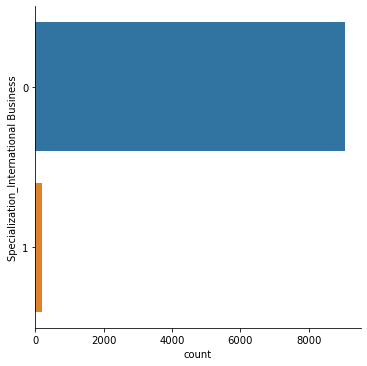

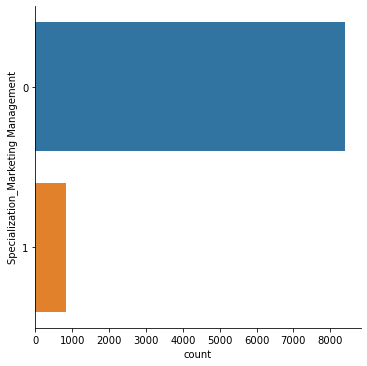

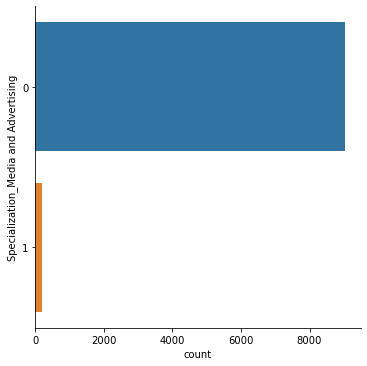

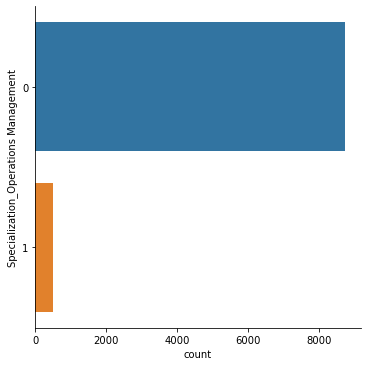

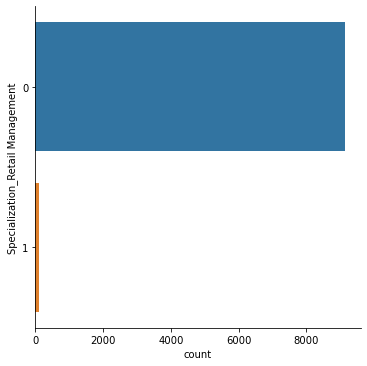

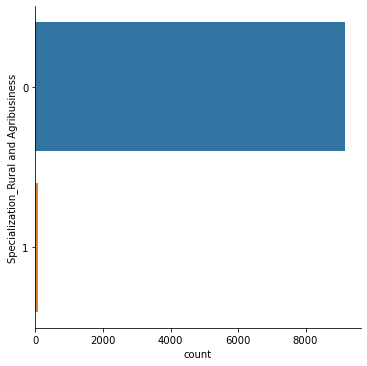

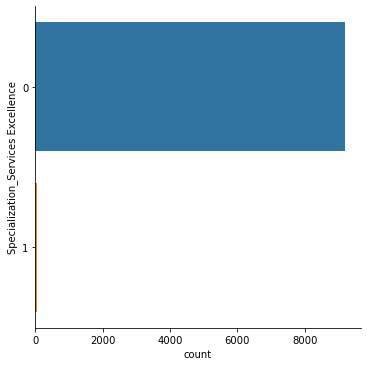

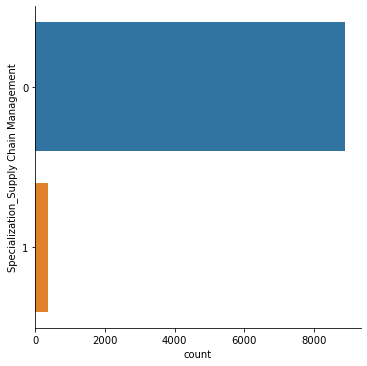

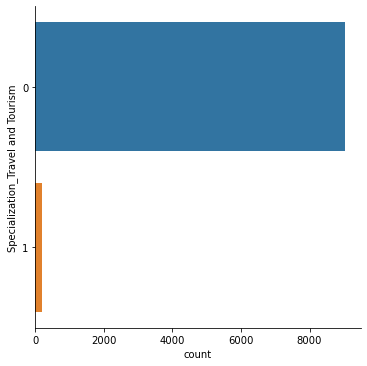

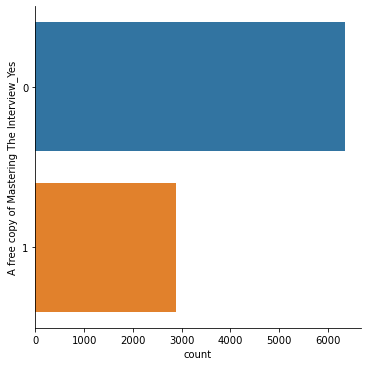

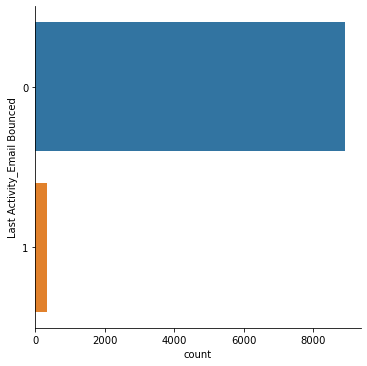

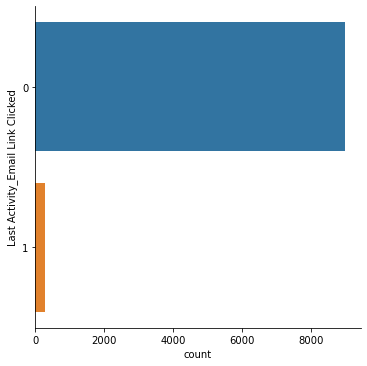

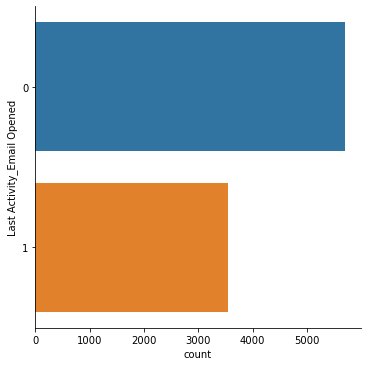

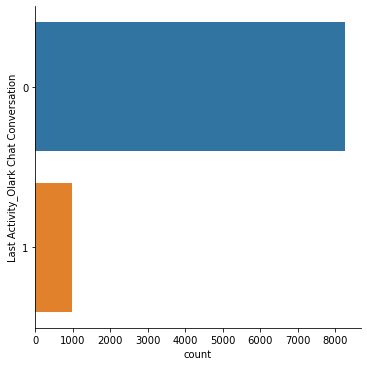

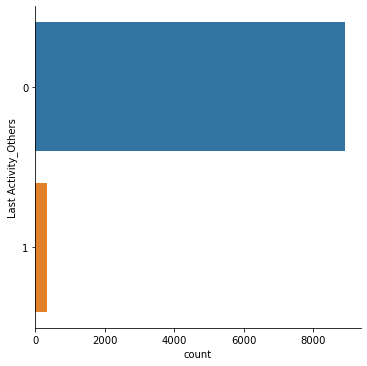

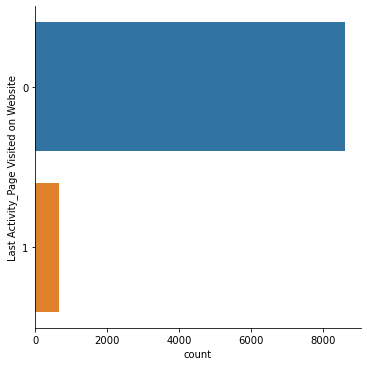

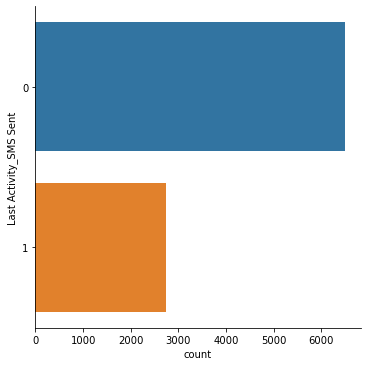

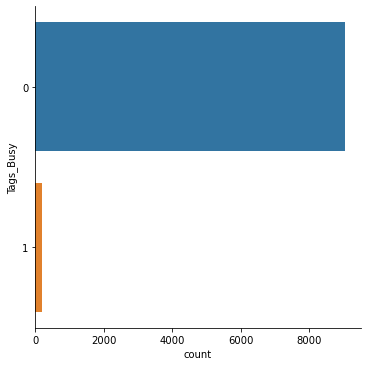

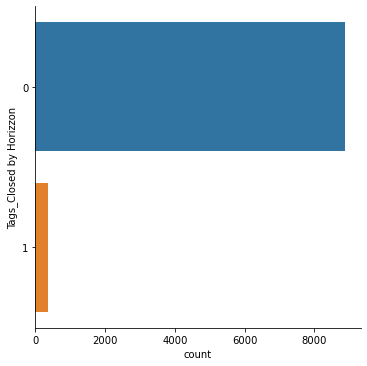

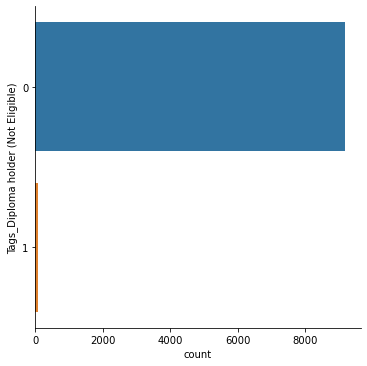

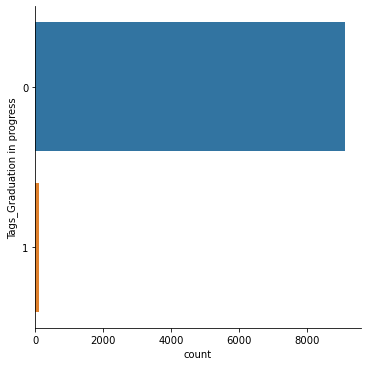

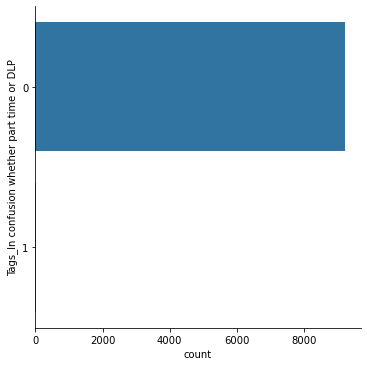

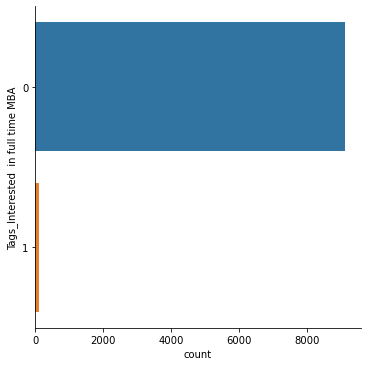

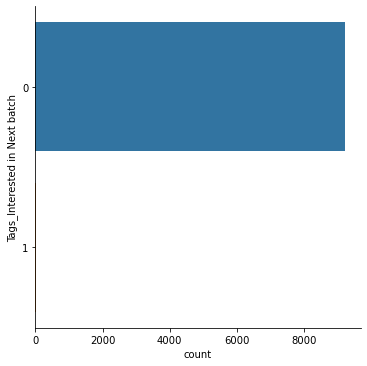

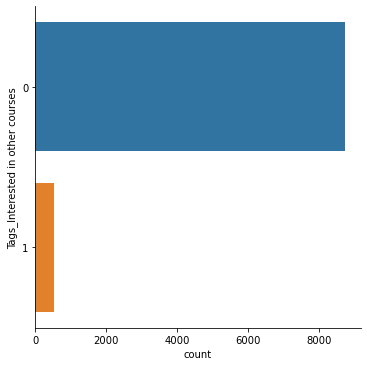

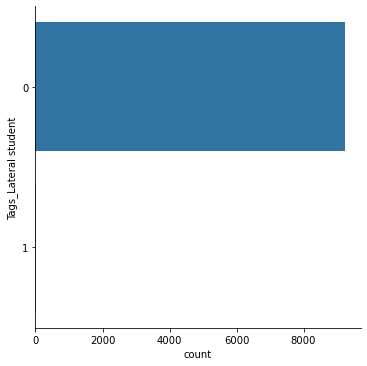

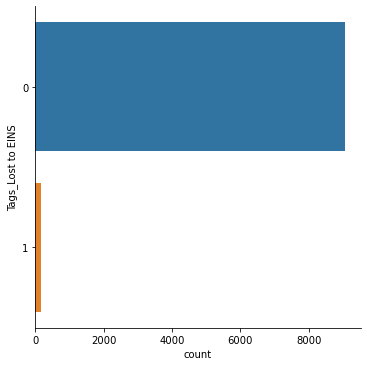

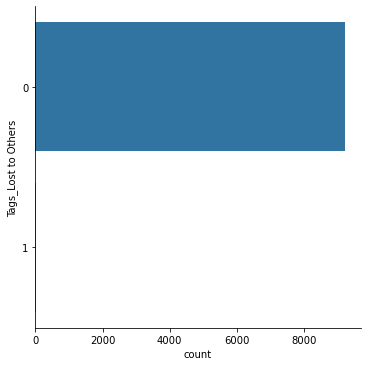

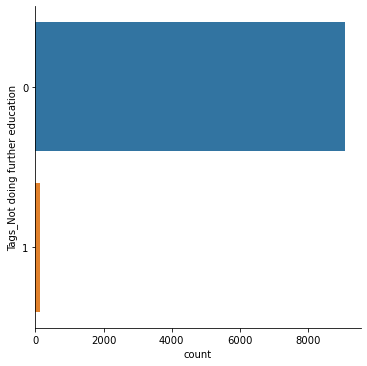

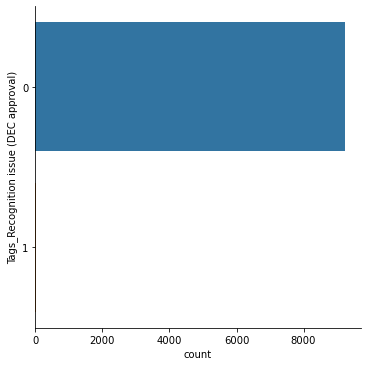

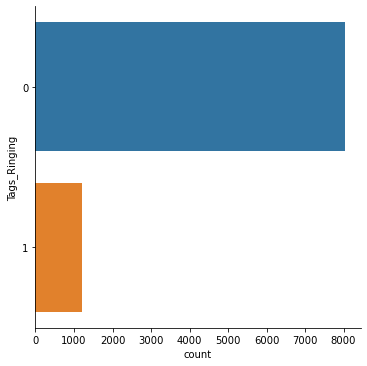

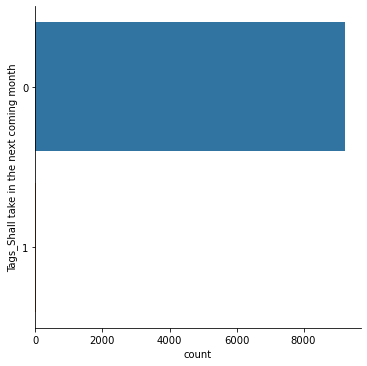

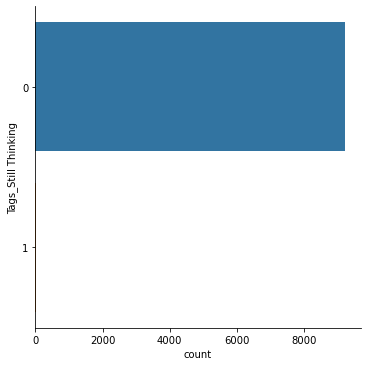

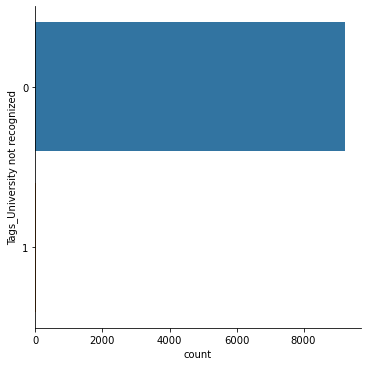

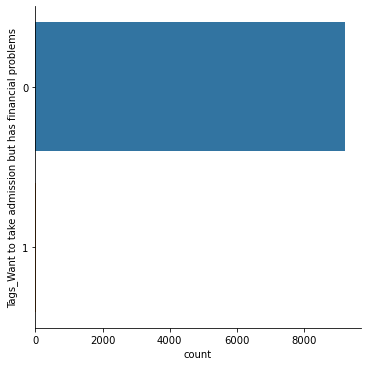

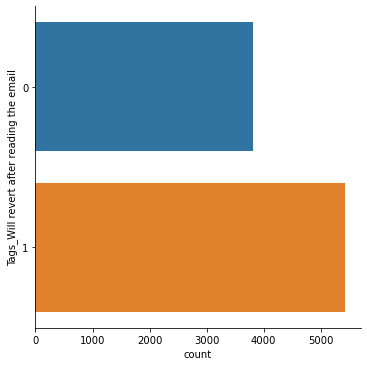

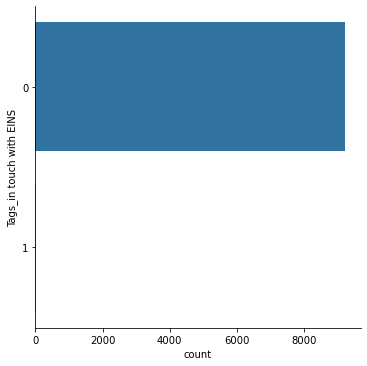

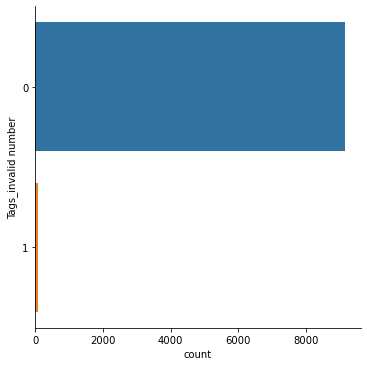

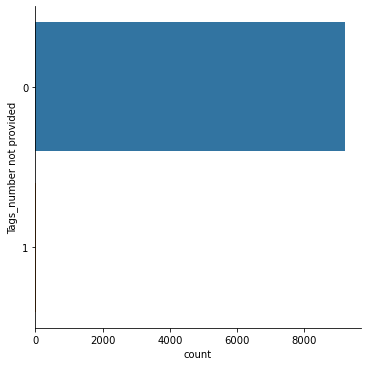

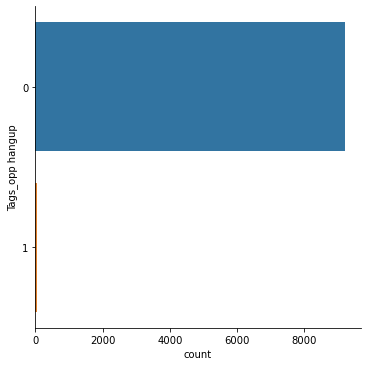

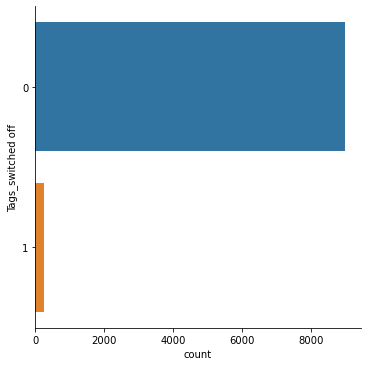

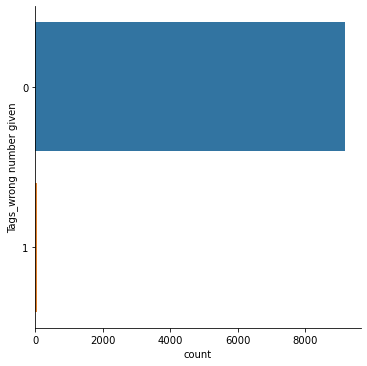

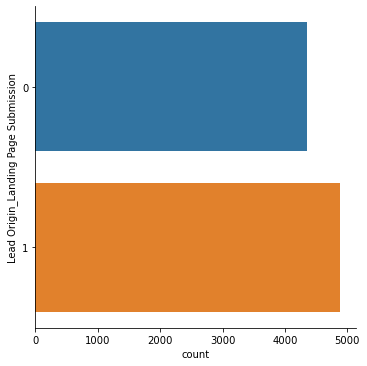

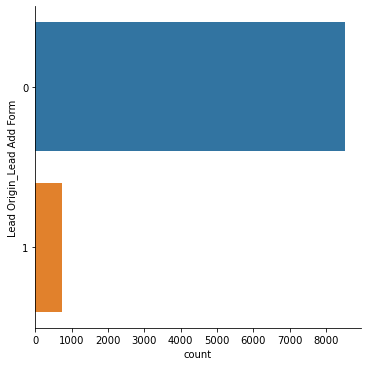

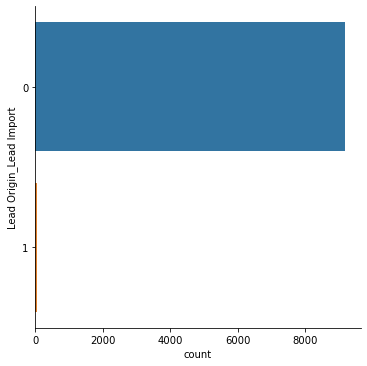

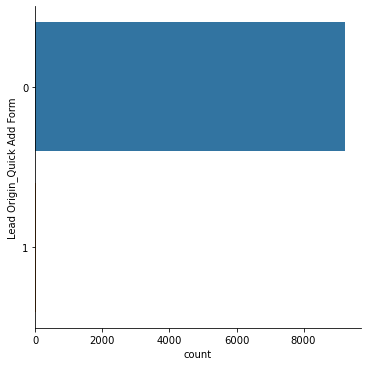

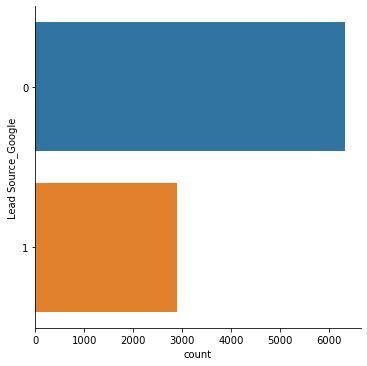

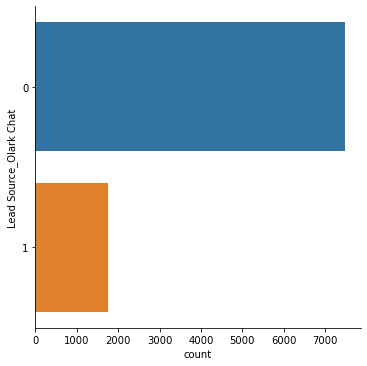

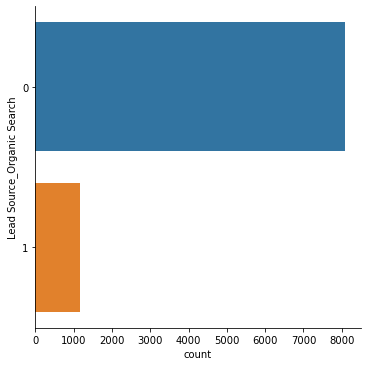

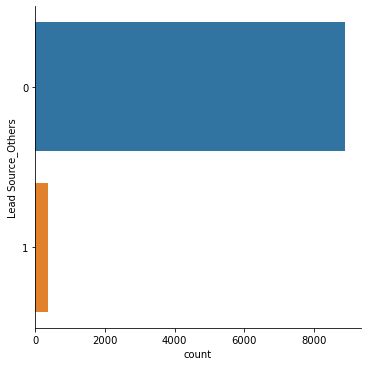

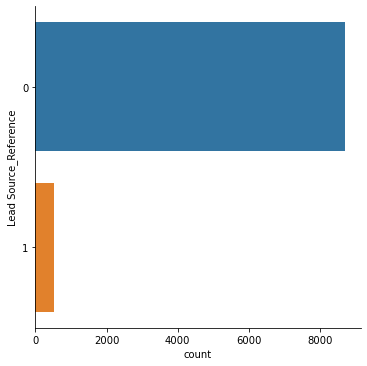

In [176]:
# Univariate Analysis of Categorical Columns
for c in categorical_column:
    cat_univariate_analysis(c)

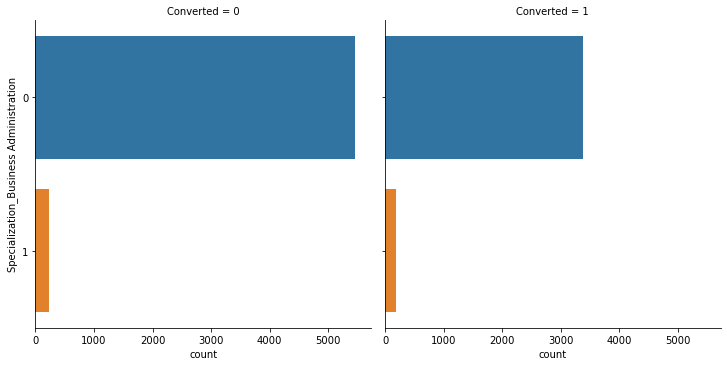

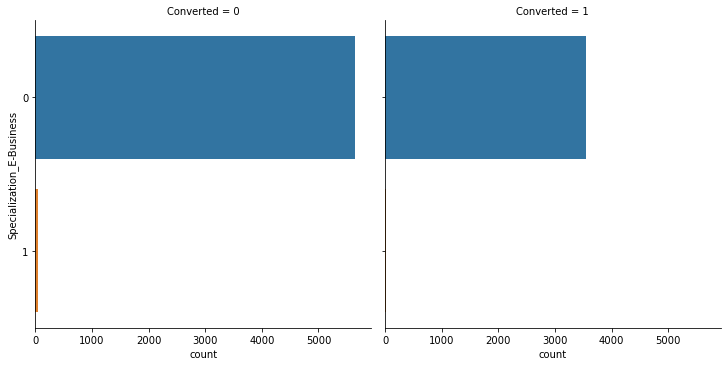

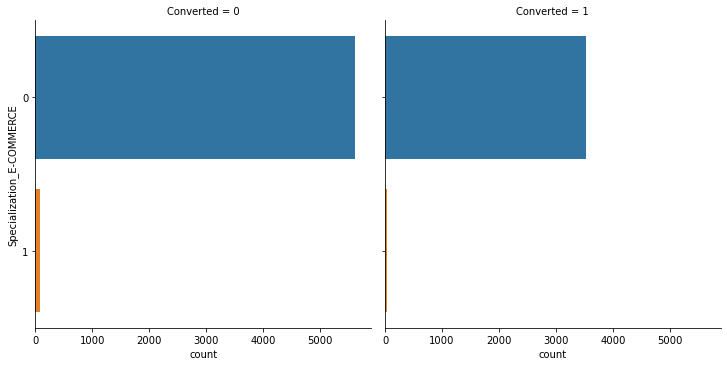

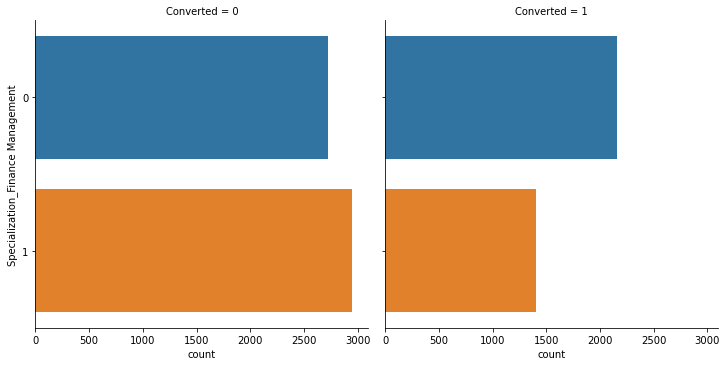

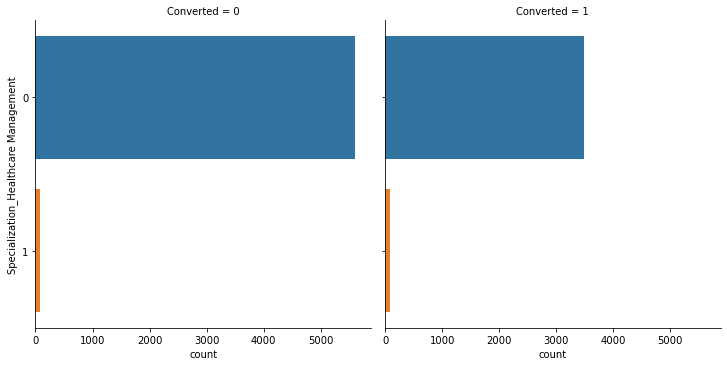

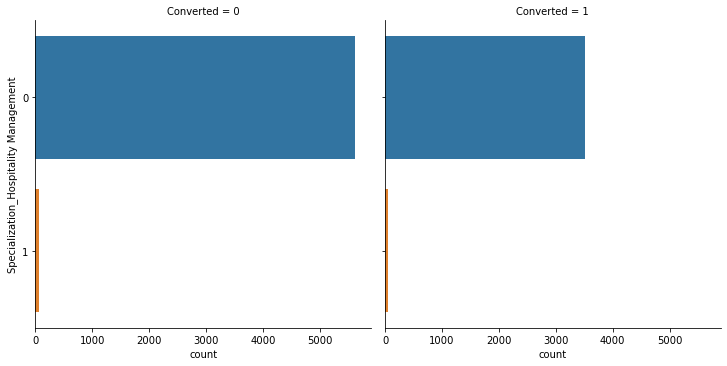

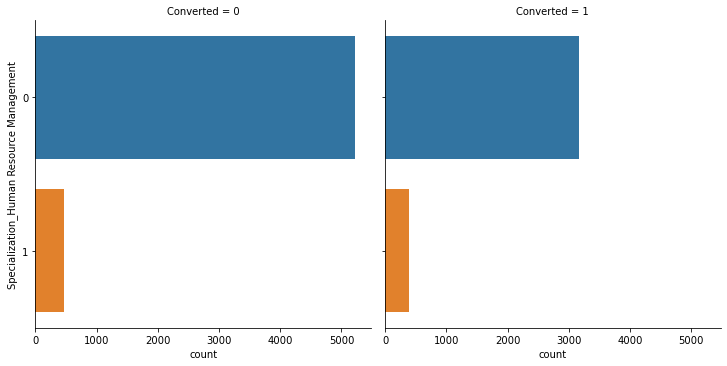

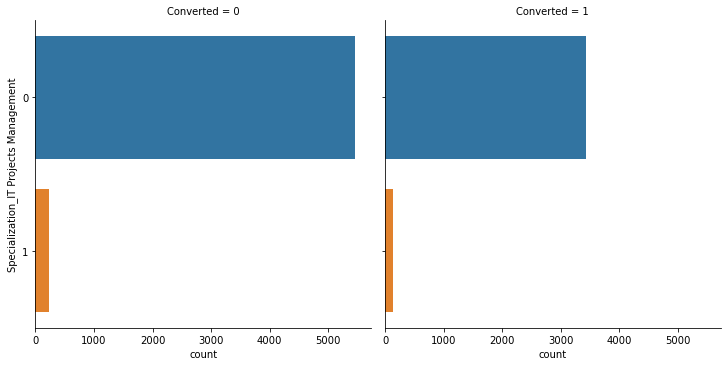

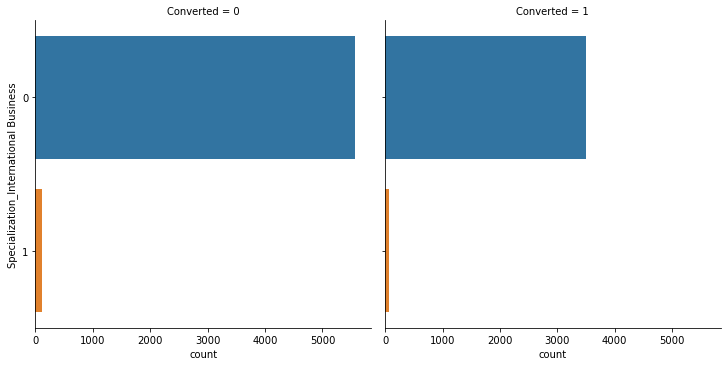

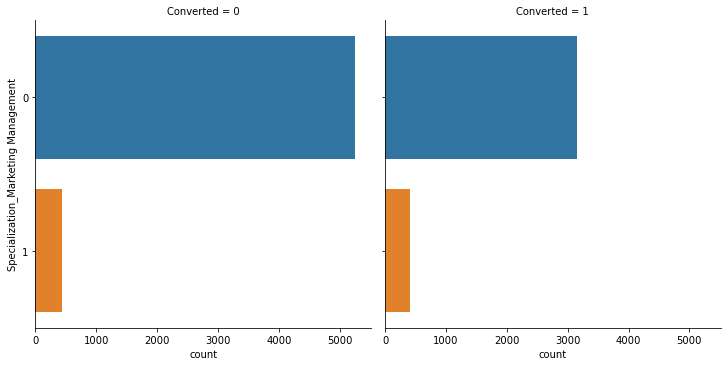

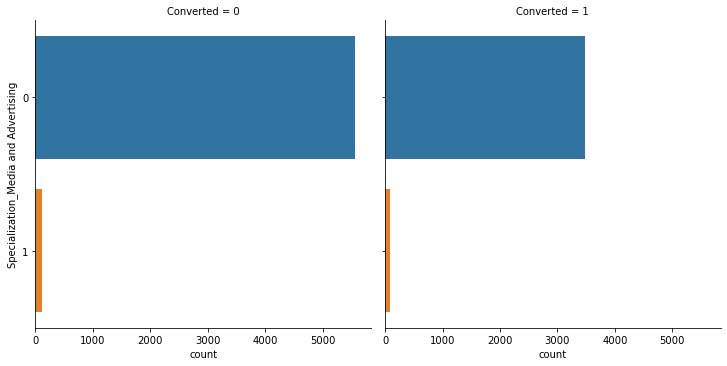

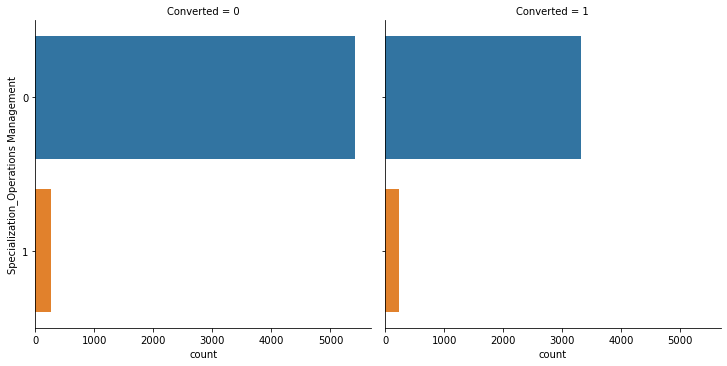

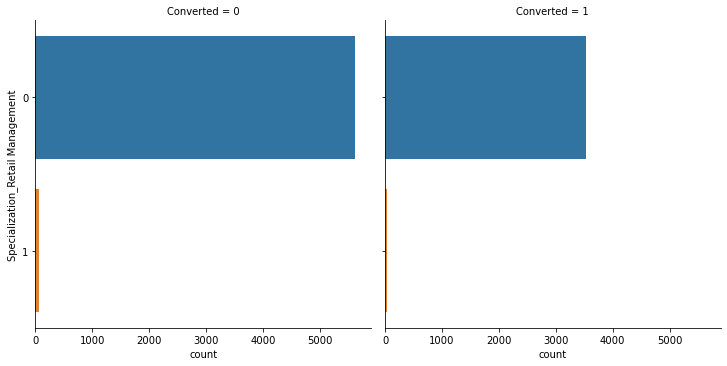

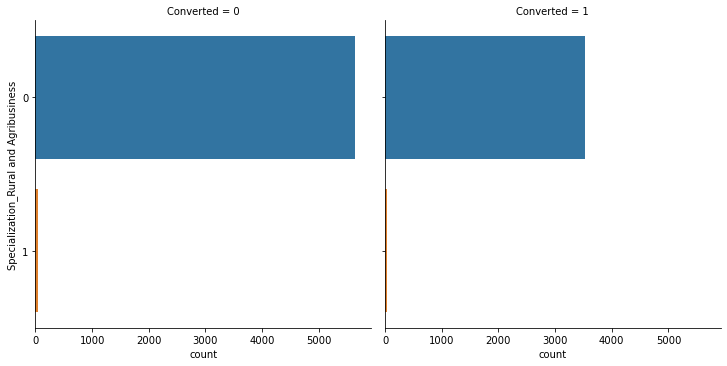

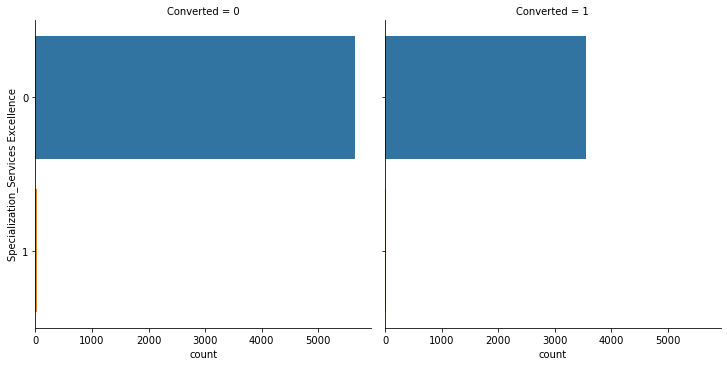

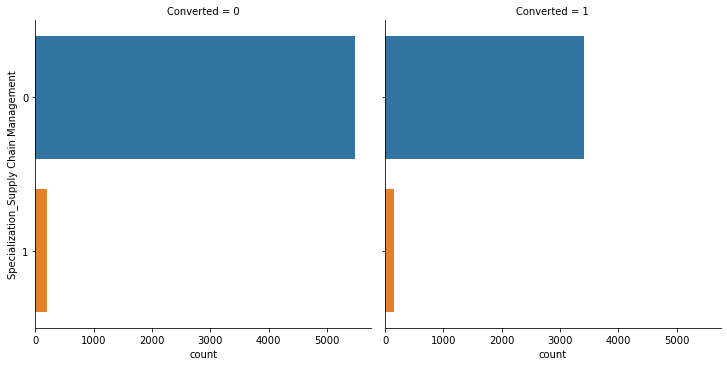

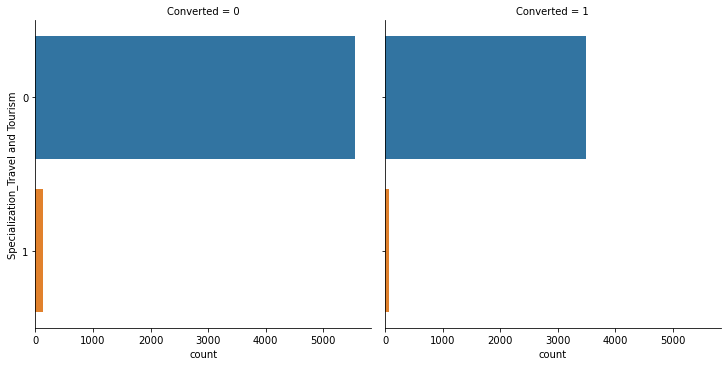

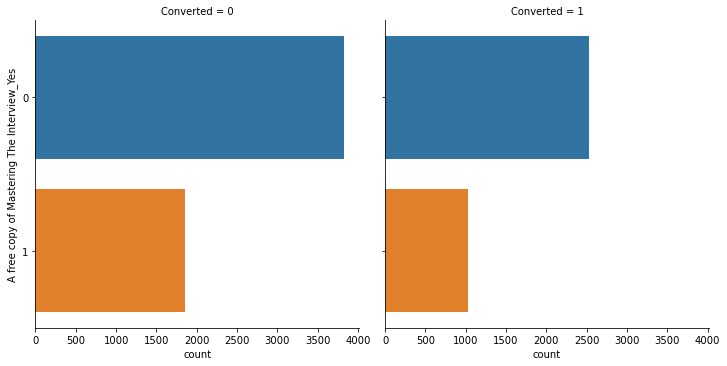

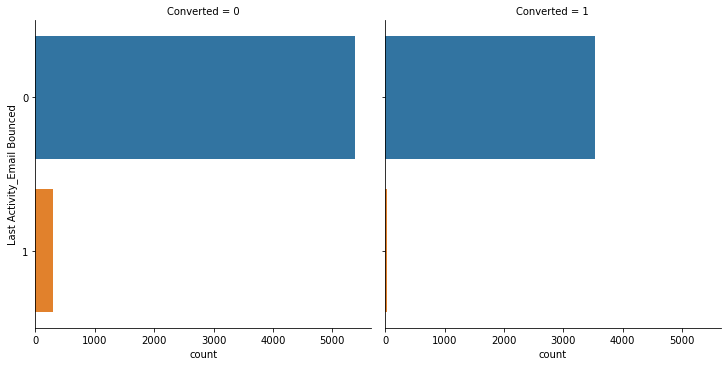

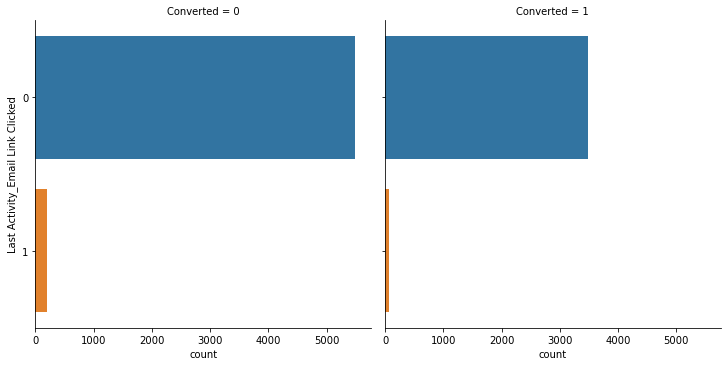

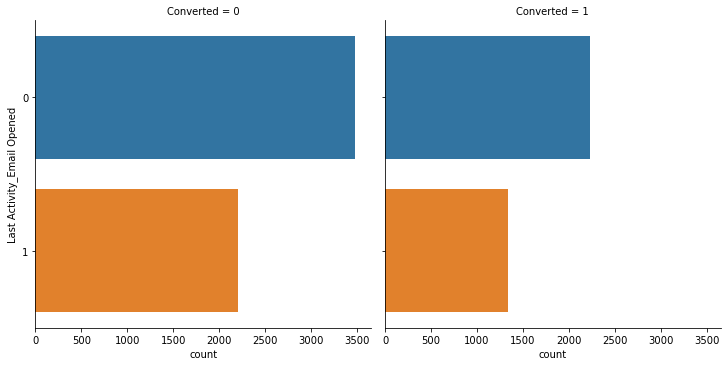

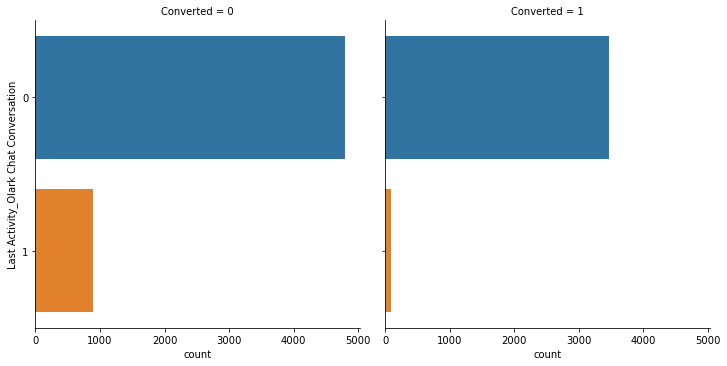

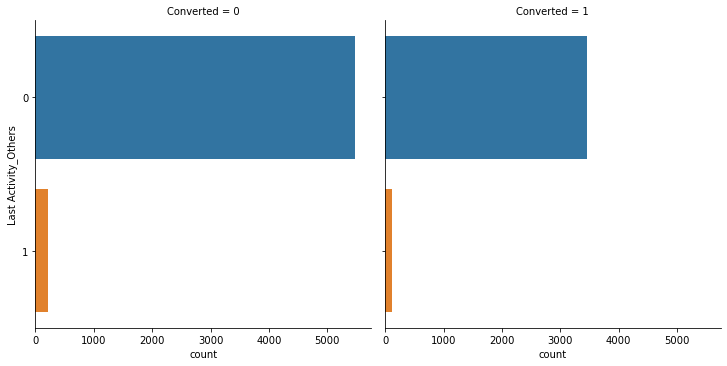

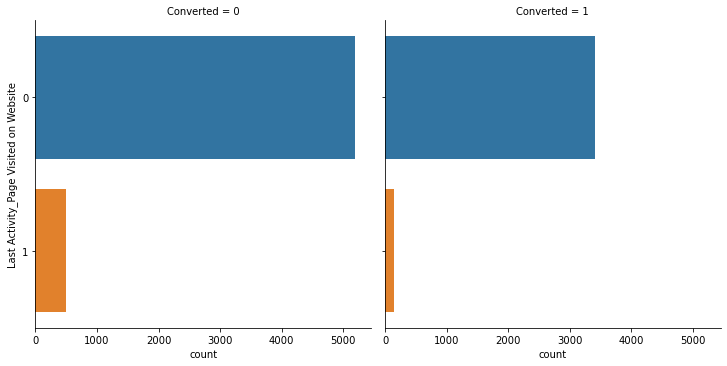

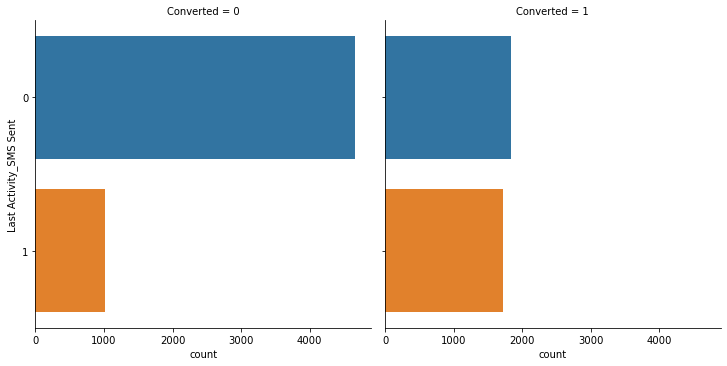

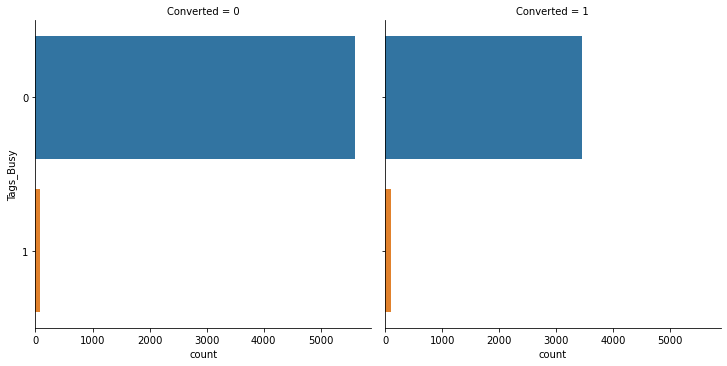

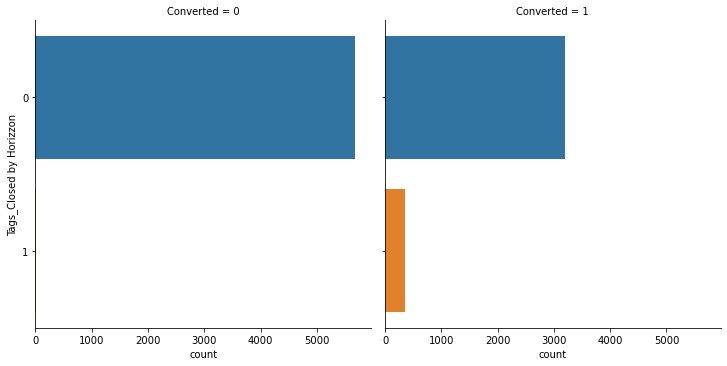

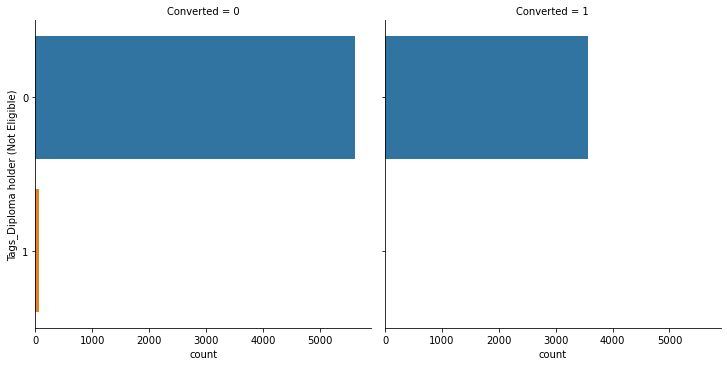

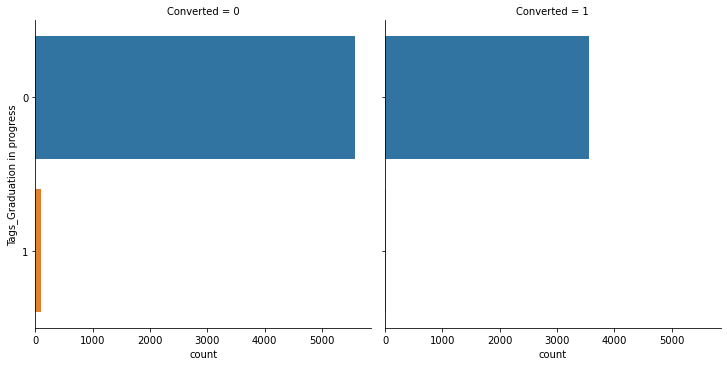

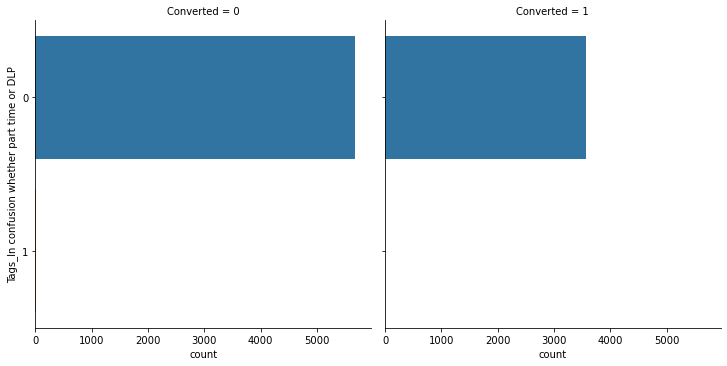

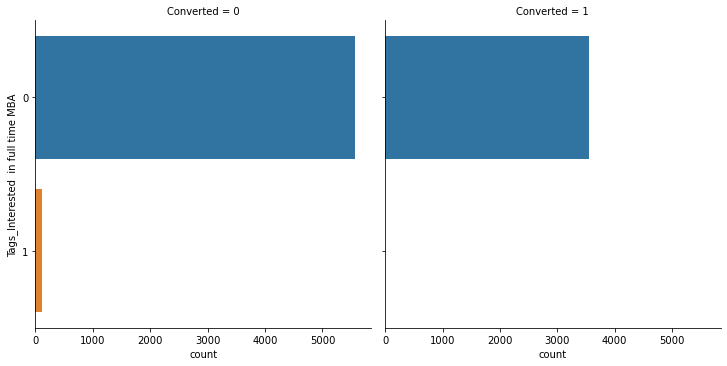

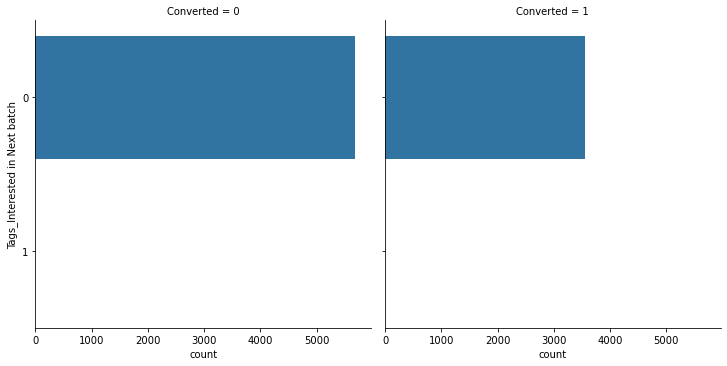

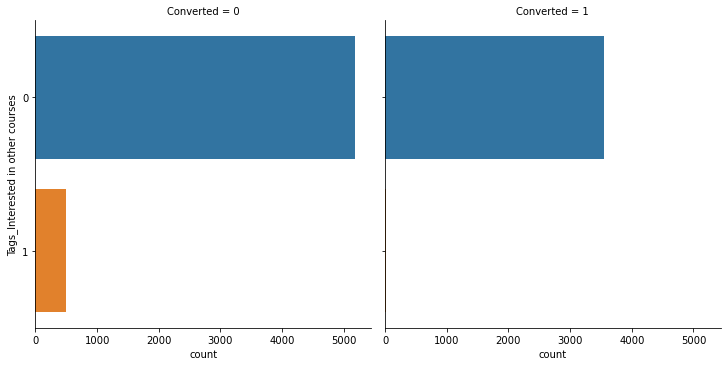

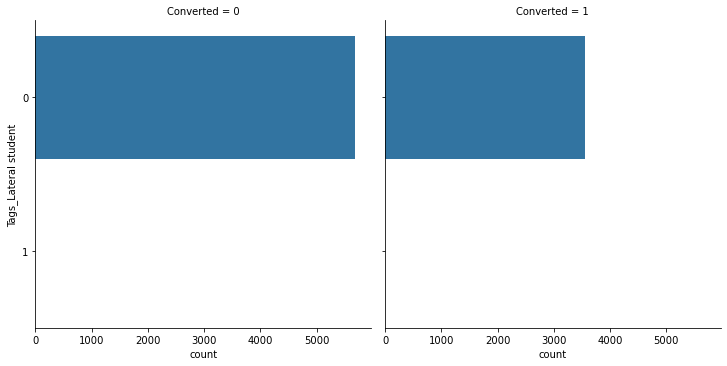

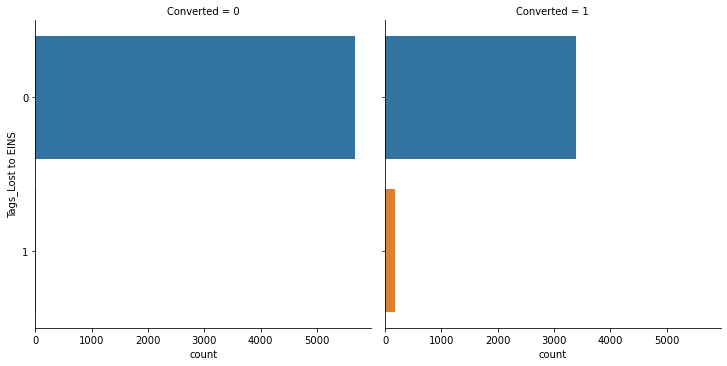

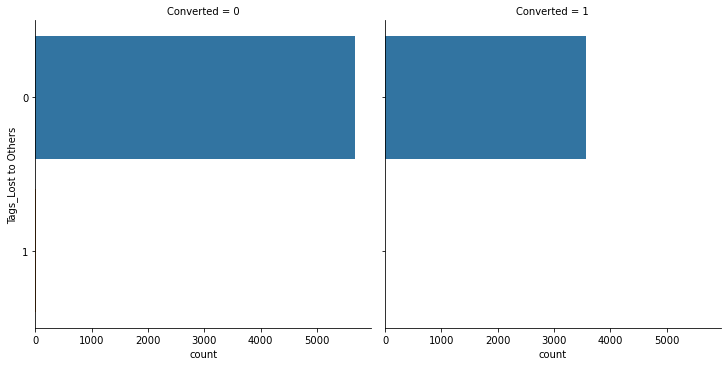

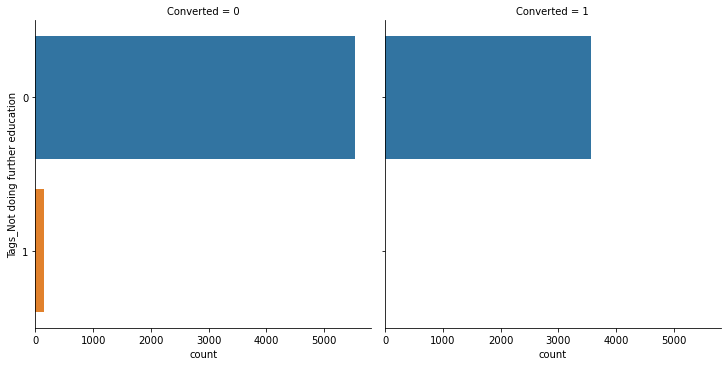

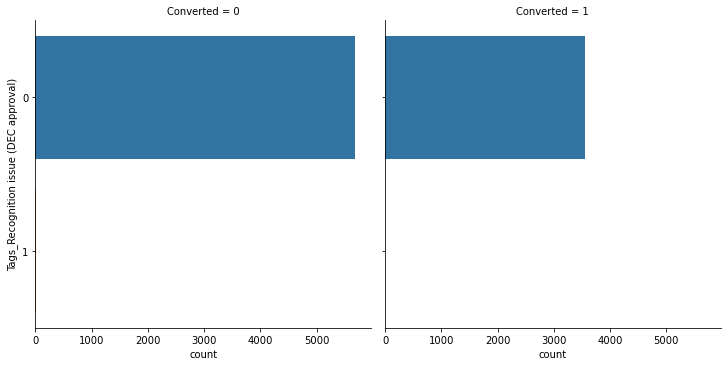

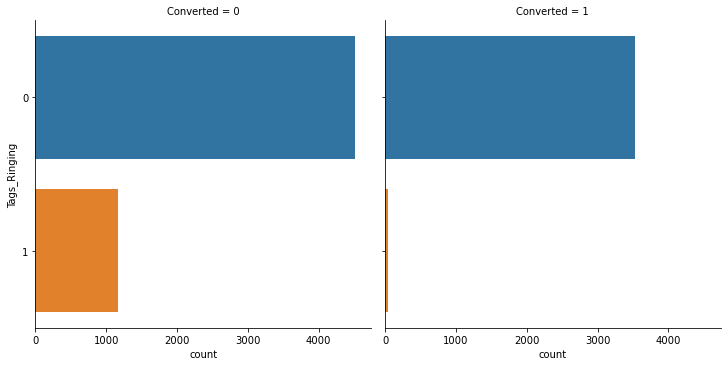

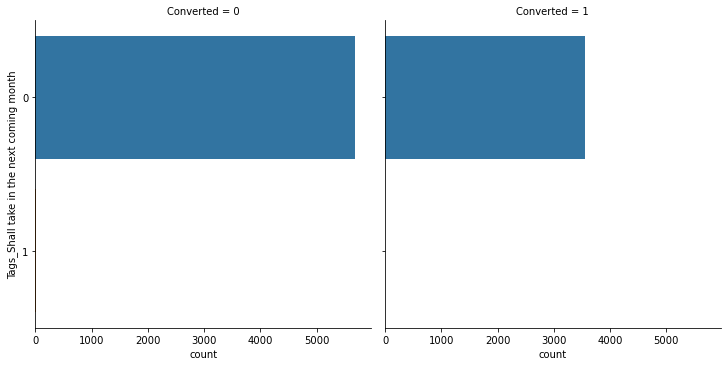

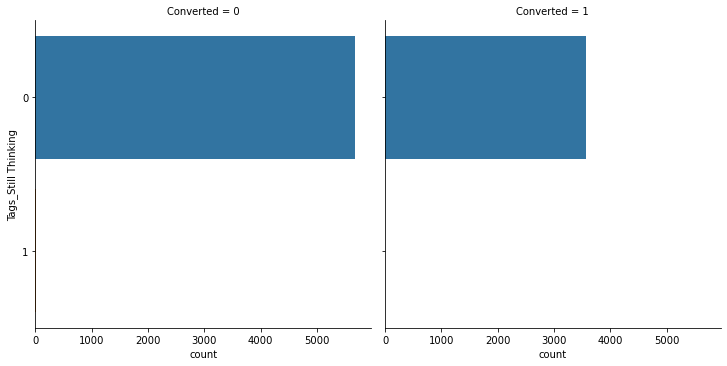

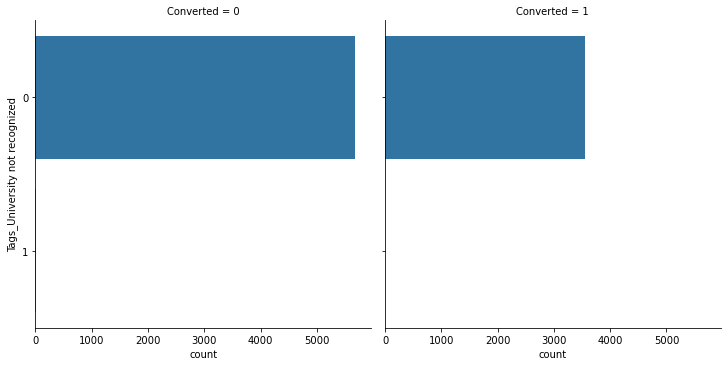

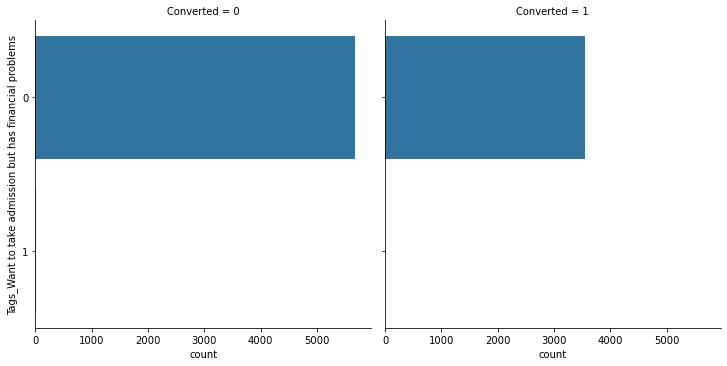

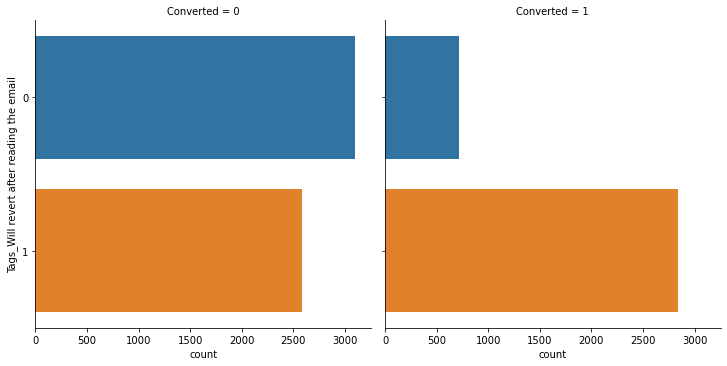

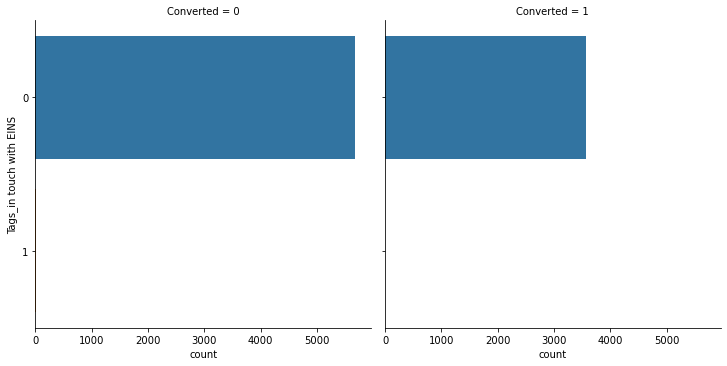

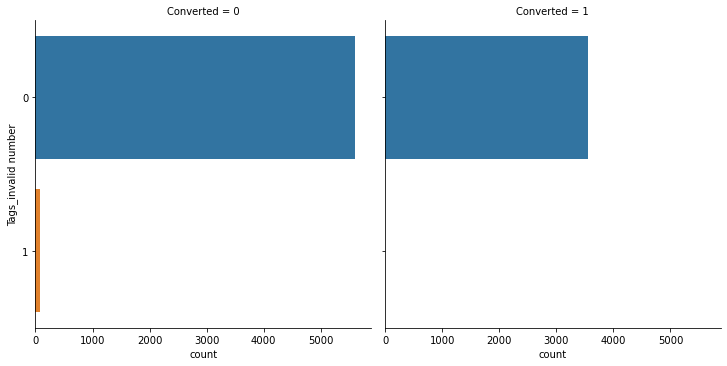

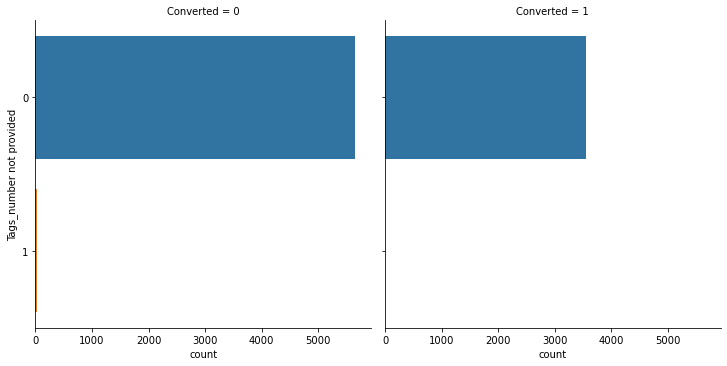

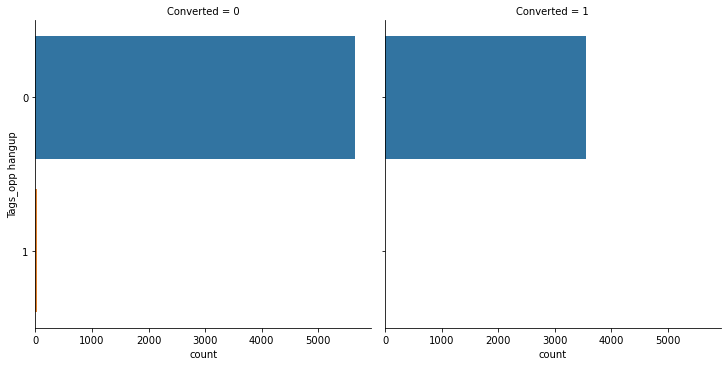

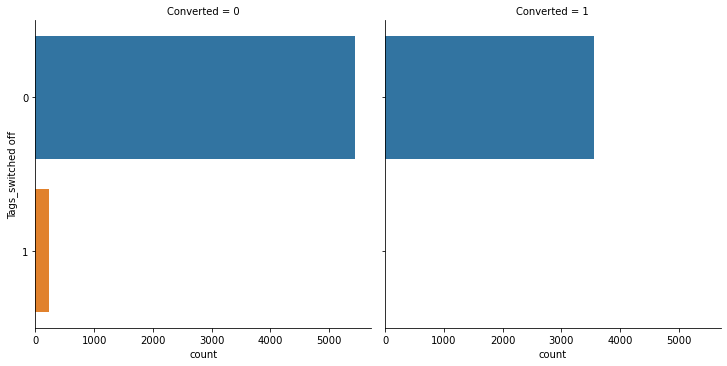

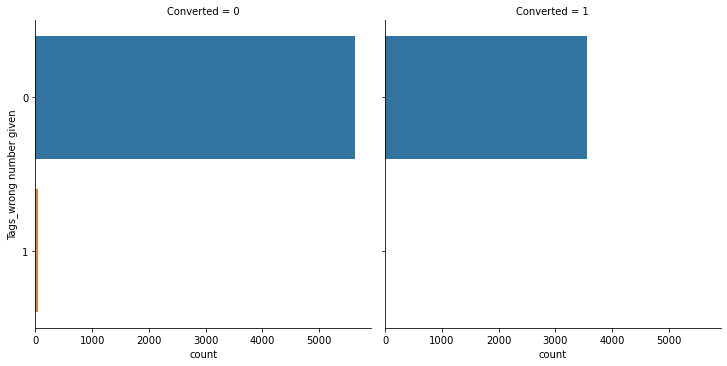

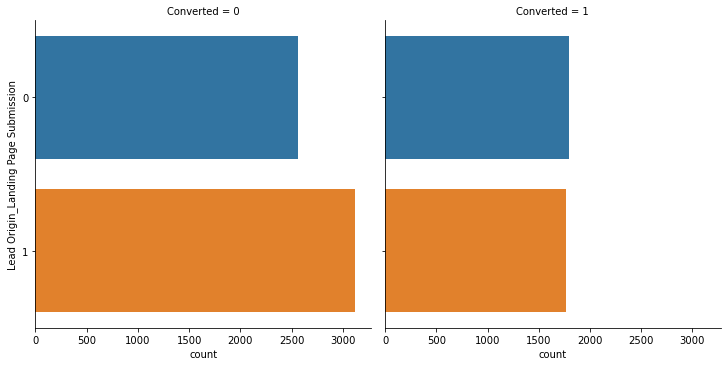

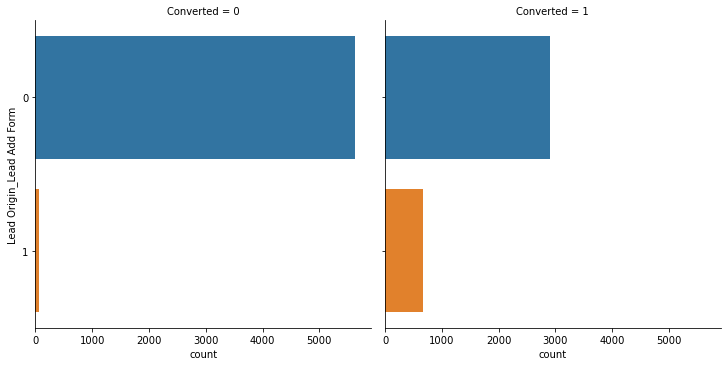

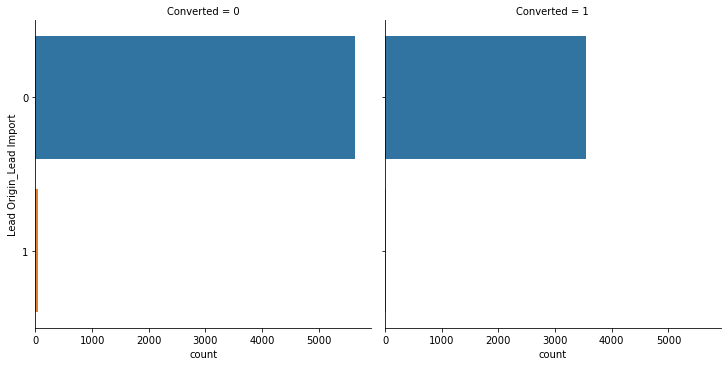

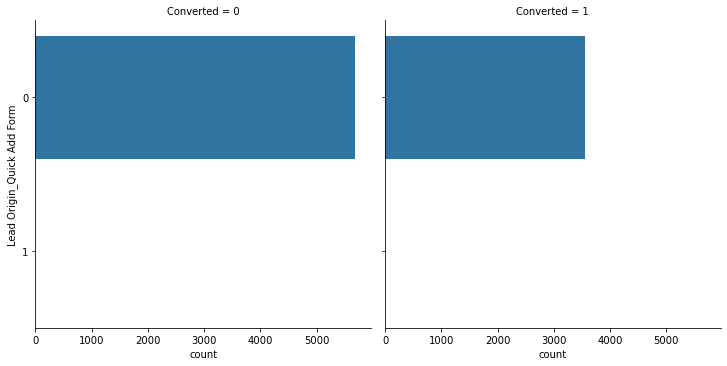

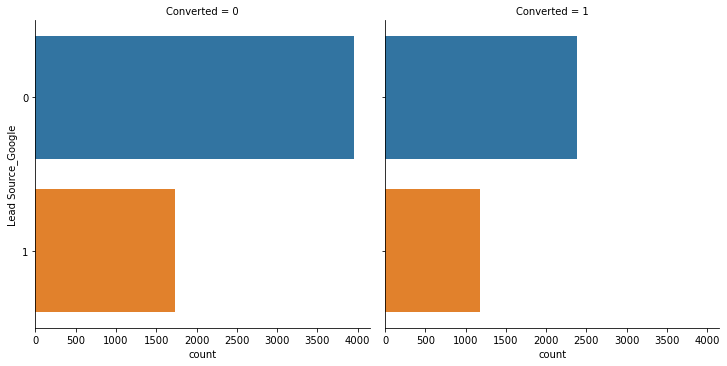

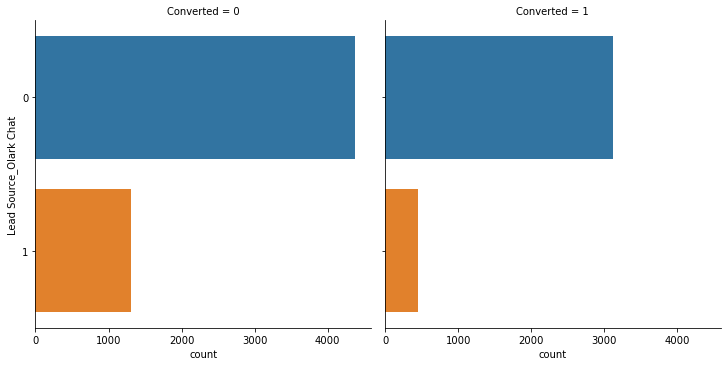

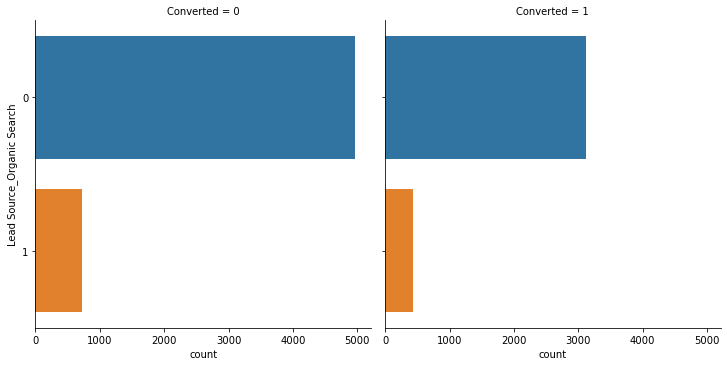

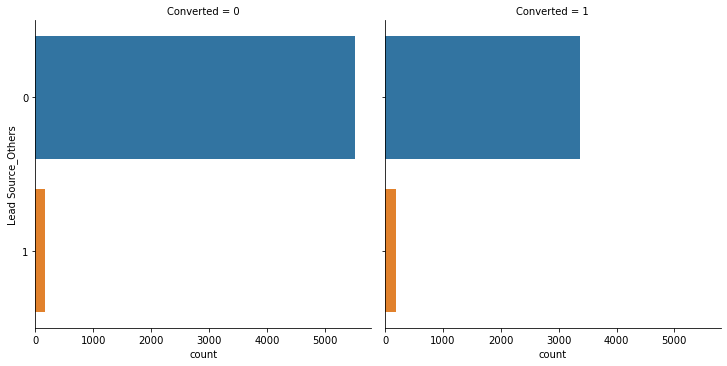

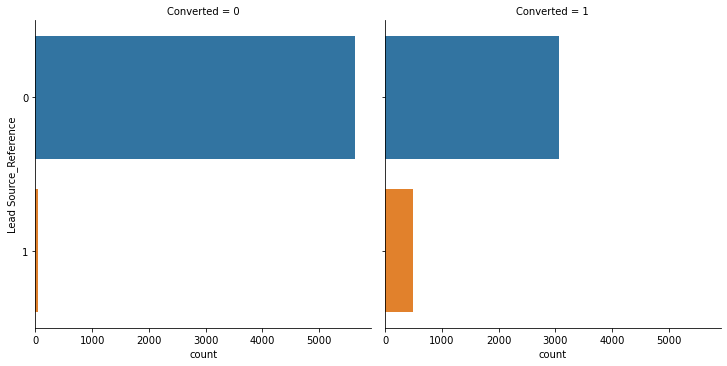

In [177]:
# Bivariate Analysis of Categorical Columns
for c in categorical_column:
    cat_bivariate_analysis('Converted',c)

##### Tags_Ringing seems to have very low converts.
##### Tags_Closed by Horizzon has all conversions.

## Step 4: Test-Train Split

In [178]:
# Putting feature variable to X
X = data_processed.drop(['Converted','Lead Number'], axis=1)

X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   Specialization_E-COMMERCE  Specialization_Finance Management  \
0                          0                                  1   
1                          0                                  1   
2                          0                                  0   
3                          0                                  0   
4                          0                                  1   

   Specialization_Healthcare Management  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Specialization_Hospitality Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_Human Resource Management  ...  Tags_wrong number given  \
0                                         0  ...                        0   
1                                         0  ...                        0   
2                                         0  ...                        0   
3                                         0  ...                        0   
4                                         0  ...                        0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 62 columns]

In [179]:
# Putting response variable to y
y = data_processed['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [180]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [181]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1871    -0.657764                    -0.885371             -1.088305   
6795     0.099483                     0.005716             -0.473232   
3516     0.288795                    -0.691418              0.067847   
8105     0.288795                     1.365219              1.223999   
3934    -0.657764                    -0.885371             -1.088305   

      Specialization_Business Administration  Specialization_E-Business  \
1871                                       0                          0   
6795                                       0                          0   
3516                                       0                          0   
8105                                       0                          0   
3934                                       0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
1871                          0                                  0   
6795                          0                                  1   
3516                          0                                  1   
8105                          0                                  0   
3934                          0                                  1   

      Specialization_Healthcare Management  \
1871                                     0   
6795                                     0   
3516                                     0   
8105                                     0   
3934                                     0   

      Specialization_Hospitality Management  \
1871                                      0   
6795                                      0   
3516                                      0   
8105                                      0   
3934                                      0   

      Specialization_Human Resource Management  ...  Tags_wrong number given  \
1871                                         0  ...                        0   
6795                                         0  ...                        0   
3516                                         0  ...                        0   
8105                                         0  ...                        0   
3934                                         0  ...                        0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
1871                        0                           0                   0   
6795                        0                           0                   0   
3516                        0                           0                   0   
8105                        0                           0                   1   
3934                        0                           0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                       1                           0                   0   
6795                       0                           0                   0   
3516                       1                           0                   0   
8105                       0                           0                   0   
3934                       1                           0                   0   

      Lead Source_Reference  
1871                      0  
6795                      0  
3516                      0  
8105                      0  
3934                      0  

[5 rows x 62 columns]

In [182]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 62 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   TotalVisits                                             6468 non-null   float64
 1   Total Time Spent on Website                             6468 non-null   float64
 2   Page Views Per Visit                                    6468 non-null   float64
 3   Specialization_Business Administration                  6468 non-null   uint8  
 4   Specialization_E-Business                               6468 non-null   uint8  
 5   Specialization_E-COMMERCE                               6468 non-null   uint8  
 6   Specialization_Finance Management                       6468 non-null   uint8  
 7   Specialization_Healthcare Management                    6468 non-null   uint8  
 8   Specialization_Hospitality Manageme

In [183]:
import statsmodels.api as sm

In [184]:
## regression model for the attributes in X_Train
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6405
Model Family:                Binomial   Df Model:                           62
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1909.0
Date:                Tue, 20 Feb 2024   Deviance:                       3817.9
Time:                        17:47:34   Pearson chi2:                 1.41e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -5.2547      0.815     -6.445      0.000      -6.853      -3.657
TotalVisits                                                0.1316      0.036      3.661      0.000       0.061       0.202
Total Time Spent on Website                                1.1542      0.051     22.696      0.000       1.054       1.254
Page Views Per Visit                                      -0.0868      0.056     -1.543      0.123      -0.197       0.023
Specialization_Business Administration                    -0.4018      0.301     -1.336      0.182      -0.991       0.188
Specialization_E-Business                                 -0.7594      0.723     -1.050      0.294      -2.176       0.658
Specialization_E-COMMERCE                                 -0.0962      0.424     -0.227      0.820      -0.927       0.734
Specialization_Finance Management                         -1.1258      0.246     -4.569      0.000      -1.609      -0.643
Specialization_Healthcare Management                      -0.1369      0.416     -0.329      0.742      -0.953       0.679
Specialization_Hospitality Management                     -1.1352      0.444     -2.558      0.011      -2.005      -0.266
Specialization_Human Resource Management                  -0.4105      0.267     -1.538      0.124      -0.934       0.112
Specialization_IT Projects Management                      0.0832      0.320      0.260      0.795      -0.544       0.710
Specialization_International Business                     -0.8394      0.367     -2.288      0.022      -1.559      -0.120
Specialization_Marketing Management                       -0.3490      0.268     -1.305      0.192      -0.873       0.175
Specialization_Media and Advertising                      -0.2887      0.358     -0.807      0.420      -0.990       0.413
Specialization_Operations Management                      -0.3564      0.288     -1.238      0.216      -0.921       0.208
Specialization_Retail Management                          -0.4851      0.454     -1.069      0.285      -1.374       0.404
Specialization_Rural and Agribusiness                      0.3116      0.536      0.582      0.561      -0.739       1.362
Specialization_Services Excellence                        -0.3324      0.603     -0.551      0.581      -1.514       0.849
Specialization_Supply Chain Management                    -0.4347      0.315     -1.382      0.167      -1.051       0.182
Specialization_Travel and Tourism                         -0.7092      0.366     -1.936      0.053      -1.427       0.009
A free copy of Mastering The Interview_Yes                -0.1981      0.132     -1.500      0.134      -0.457       0.061
Last Act

## Step 7: Feature Selection Using RFE

In [185]:
## Importing the LogisticRegression Model from sklearn.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [186]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [187]:
rfe.support_ ## provides true or false for each attribute values.

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True,  True,  True, False, False, False,  True, False,
        True,  True, False, False, False,  True,  True, False, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False, False, False, False, False, False])

In [188]:
## Displaying the number of columns and there weight details selected via RFE.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 39),
 ('Specialization_Business Administration', False, 25),
 ('Specialization_E-Business', False, 18),
 ('Specialization_E-COMMERCE', False, 41),
 ('Specialization_Finance Management', False, 6),
 ('Specialization_Healthcare Management', False, 42),
 ('Specialization_Hospitality Management', False, 9),
 ('Specialization_Human Resource Management', False, 24),
 ('Specialization_IT Projects Management', False, 17),
 ('Specialization_International Business', False, 12),
 ('Specialization_Marketing Management', False, 29),
 ('Specialization_Media and Advertising', False, 38),
 ('Specialization_Operations Management', False, 27),
 ('Specialization_Retail Management', False, 23),
 ('Specialization_Rural and Agribusiness', False, 7),
 ('Specialization_Services Excellence', False, 28),
 ('Specialization_Supply Chain Management', False, 26),
 ('Specialization_Travel and Tourism', False, 15)

In [189]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Origin_Lead Add Form'],
      dtype='object')

In [190]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'A free copy of Mastering The Interview_Yes',
       'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 

In [191]:
## regression model for the attributes in X_Train
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.1
Date:                Tue, 20 Feb 2024   Deviance:                       3976.3
Time:                        17:49:00   Pearson chi2:                 1.10e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.8895      0.230    -21.214      0.000      -5.341      -4.438
Total Time Spent on Website                  1.0354      0.043     24.119      0.000       0.951       1.120
Last Activity_Email Bounced                 -1.1299      0.330     -3.422      0.001      -1.777      -0.483
Last Activity_Email Opened                   1.1958      0.112     10.640      0.000       0.976       1.416
Last Activity_Others                         1.0842      0.230      4.722      0.000       0.634       1.534
Last Activity_SMS Sent                       2.6125      0.120     21.714      0.000       2.377       2.848
Tags_Busy                                    2.7869      0.301      9.249      0.000       2.196       3.378
Tags_Closed by Horizzon                      8.5010      1.032      8.241      0.000       6.479      10.523
Tags_Diploma holder (Not Eligible)         -22.0808   2.72e+04     -0.001      0.999   -5.33e+04    5.32e+04
Tags_Interested in Next batch               26.1683   9.06e+04      0.000      1.000   -1.77e+05    1.78e+05
Tags_Lateral student                        27.7485   1.13e+05      0.000      1.000   -2.21e+05    2.21e+05
Tags_Lost to EINS                            7.8731      0.759     10.370      0.000       6.385       9.361
Tags_Ringing                                -1.1050      0.304     -3.638      0.000      -1.700      -0.510
Tags_Shall take in the next coming month    30.1765   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Tags_Will revert after reading the email     3.4254      0.216     15.845      0.000       3.002       3.849
Tags_in touch with EINS                      2.7734      0.822      3.374      0.001       1.163       4.384
Tags_invalid number                         -1.3677      1.147     -1.192      0.233      -3.617       0.881
Tags_number not provided                   -22.3780   4.05e+04     -0.001      1.000   -7.94e+04    7.94e+04
Tags_switched off                           -1.0165      0.562     -1.810      0.070      -2.117       0.084
Tags_wrong number given                    -22.6536   3.31e+04     -0.001      0.999    -6.5e+04    6.49e+04
Lead Origin_Lead Add Form                    3.2352      0.219     14.763      0.000       2.806       3.665
============================================================================================================
"""

In [192]:
## Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.003284
6795    0.434770
3516    0.004011
8105    0.122558
3934    0.234141
4844    0.955945
3297    0.003855
8071    0.999529
987     0.302210
7423    0.960564
dtype: float64

In [193]:
## Reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00328389, 0.43476988, 0.00401133, 0.12255811, 0.23414127,
       0.95594502, 0.00385548, 0.99952902, 0.30221033, 0.9605636 ])

In [194]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID
0          0         0.003284    1871
1          0         0.434770    6795
2          0         0.004011    3516
3          0         0.122558    8105
4          0         0.234141    3934

In [195]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  predicted
0          0         0.003284    1871          0
1          0         0.434770    6795          0
2          0         0.004011    3516          0
3          0         0.122558    8105          0
4          0         0.234141    3934          0

In [196]:
from sklearn import metrics

In [197]:
## Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3606  396]
 [ 406 2060]]


In [198]:
## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8760049474335189


## Checking VIFs

In [199]:
## Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [200]:
## Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13  Tags_Will revert after reading the email  2.60
4                     Last Activity_SMS Sent  2.27
2                 Last Activity_Email Opened  2.12
11                              Tags_Ringing  1.46
19                 Lead Origin_Lead Add Form  1.36
6                    Tags_Closed by Horizzon  1.29
3                       Last Activity_Others  1.10
17                         Tags_switched off  1.10
0                Total Time Spent on Website  1.09
1                Last Activity_Email Bounced  1.08
5                                  Tags_Busy  1.08
10                         Tags_Lost to EINS  1.05
15                       Tags_invalid number  1.03
18                   Tags_wrong number given  1.02
8              Tags_Interested in Next batch  1.01
7         Tags_Diploma holder (Not Eligible)  1.01
14                   Tags_in touch with EINS  1.01
16                  Tags_number not provided  1.01
9                       Tags_Lateral student  1.00
12  Tags_Shall take in the next coming month  1.00

#### Clearly there is not much multicollinearity present in our model among the selected features as per their VIF values.

#### Let us now check the correlation among the features in the below heat map.

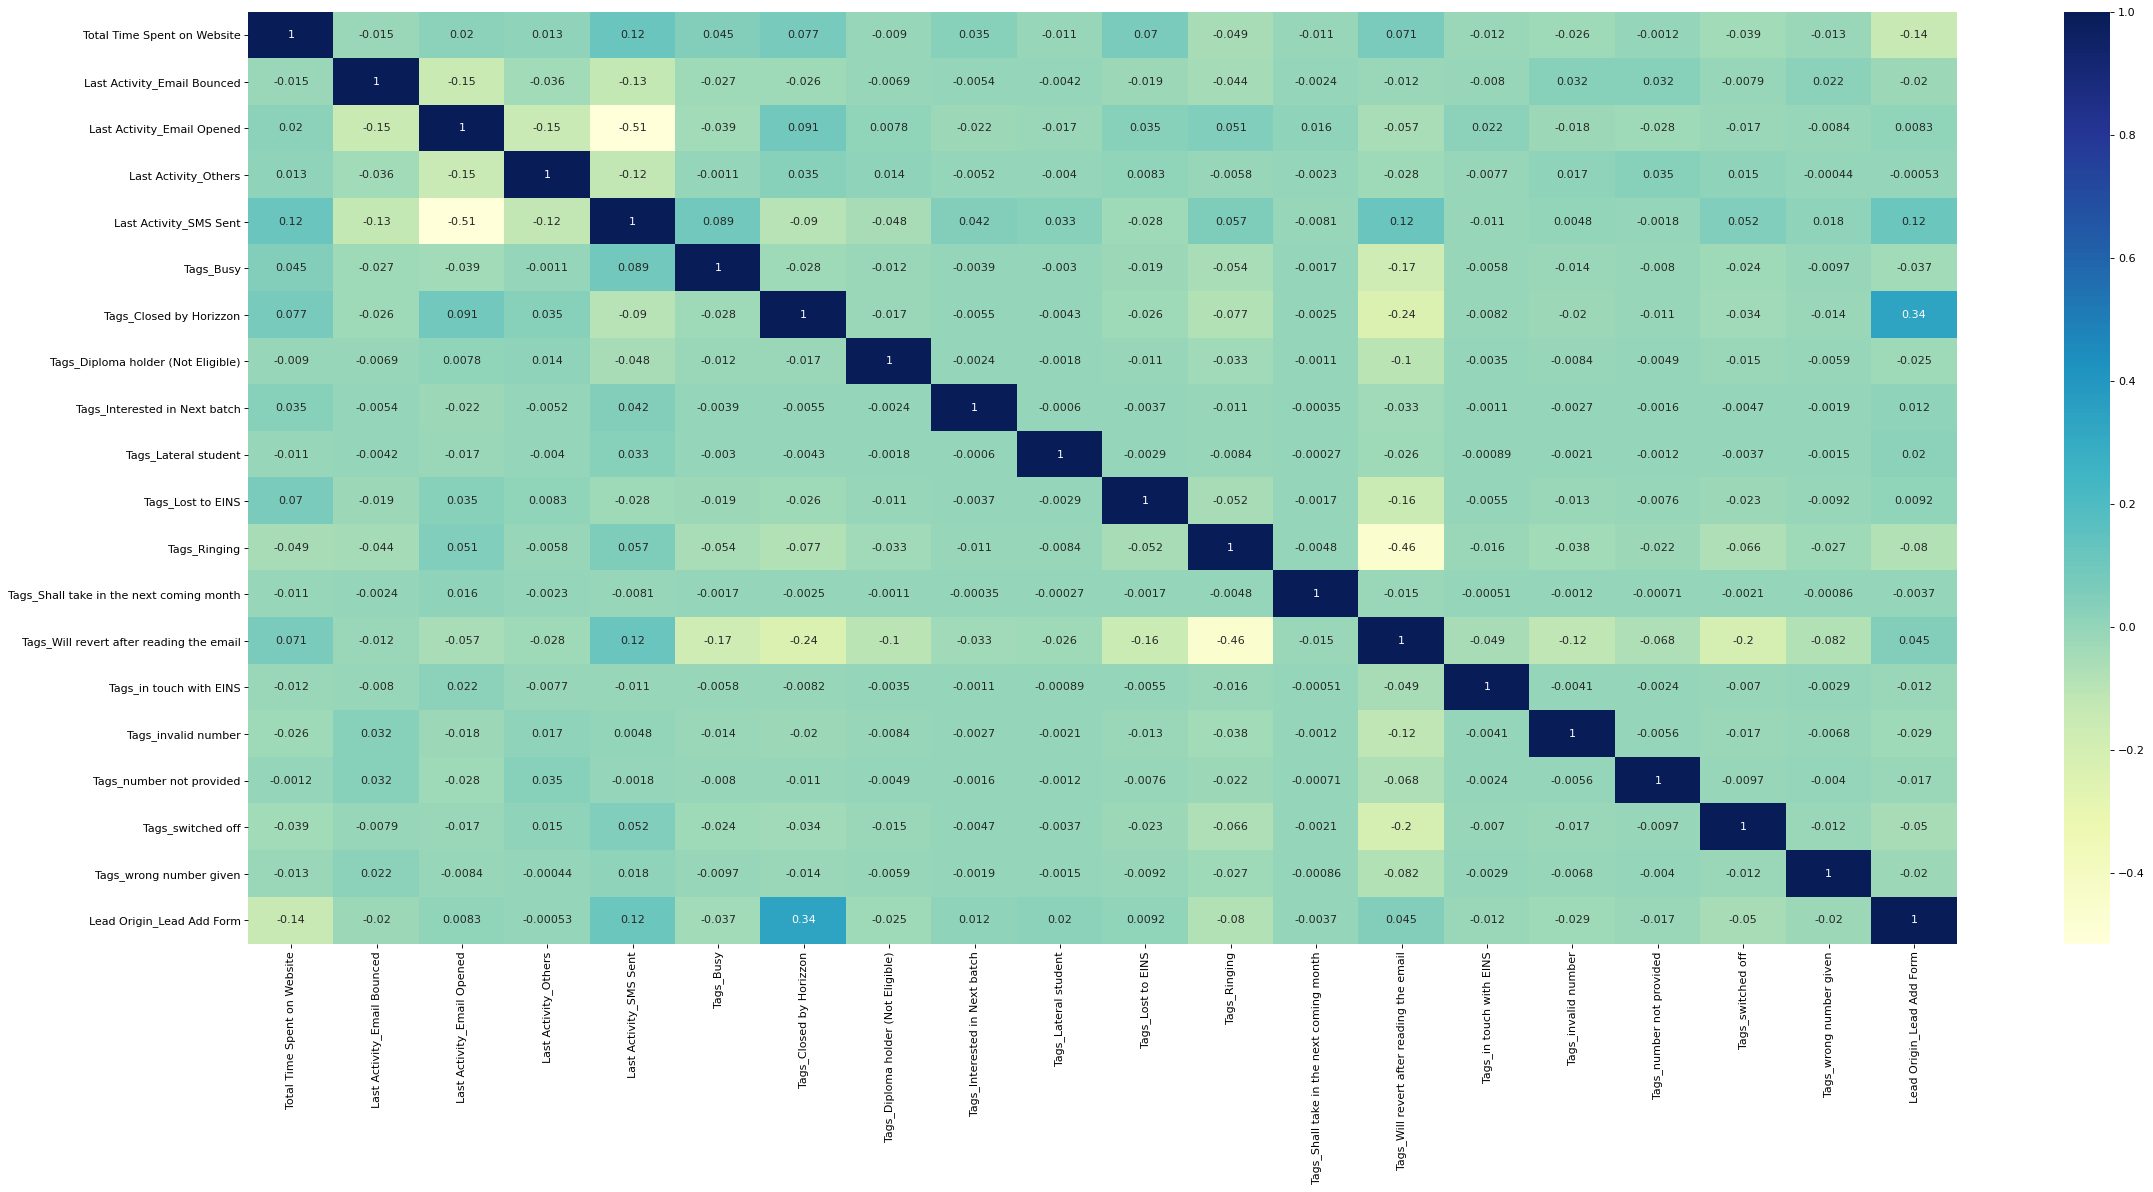

In [201]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(30,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

##### Dropping feature with high p-score, that indicates model bias, since VIF is low.

In [202]:
col = col.drop('Tags_Interested in Next batch', 1)
col

Index(['Total Time Spent on Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Origin_Lead Add Form'],
      dtype='object')

In [203]:
## Using Logistic Regression post removal of high p-value holding attribute.
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1992.7
Date:                Tue, 20 Feb 2024   Deviance:                       3985.5
Time:                        17:51:08   Pearson chi2:                 1.10e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.7829      0.219    -21.801      0.000      -5.213      -4.353
Total Time Spent on Website                  1.0386      0.043     24.248      0.000       0.955       1.123
Last Activity_Email Bounced                 -1.1333      0.330     -3.430      0.001      -1.781      -0.486
Last Activity_Email Opened                   1.1942      0.112     10.629      0.000       0.974       1.414
Last Activity_Others                         1.0837      0.229      4.723      0.000       0.634       1.534
Last Activity_SMS Sent                       2.6271      0.120     21.845      0.000       2.391       2.863
Tags_Busy                                    2.6712      0.293      9.122      0.000       2.097       3.245
Tags_Closed by Horizzon                      8.3935      1.029      8.155      0.000       6.376      10.411
Tags_Diploma holder (Not Eligible)         -22.1915   2.71e+04     -0.001      0.999   -5.32e+04    5.32e+04
Tags_Lateral student                        27.6277   1.13e+05      0.000      1.000   -2.21e+05    2.21e+05
Tags_Lost to EINS                            7.7678      0.756     10.275      0.000       6.286       9.250
Tags_Ringing                                -1.2270      0.295     -4.160      0.000      -1.805      -0.649
Tags_Shall take in the next coming month    30.0743   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Tags_Will revert after reading the email     3.3147      0.204     16.236      0.000       2.915       3.715
Tags_in touch with EINS                      2.6657      0.820      3.252      0.001       1.059       4.272
Tags_invalid number                         -1.4897      1.147     -1.299      0.194      -3.737       0.757
Tags_number not provided                   -22.4955   4.05e+04     -0.001      1.000   -7.93e+04    7.93e+04
Tags_switched off                           -1.1354      0.557     -2.039      0.041      -2.227      -0.044
Tags_wrong number given                    -22.7713   3.31e+04     -0.001      0.999   -6.49e+04    6.49e+04
Lead Origin_Lead Add Form                    3.2520      0.219     14.866      0.000       2.823       3.681
============================================================================================================
"""

In [204]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.003220
6795    0.433377
3516    0.003935
8105    0.122935
3934    0.232629
4844    0.956629
3297    0.003782
8071    0.999536
987     0.301756
7423    0.961192
dtype: float64

In [205]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0032198 , 0.43337722, 0.00393547, 0.12293472, 0.23262865,
       0.95662949, 0.0037821 , 0.99953583, 0.30175644, 0.96119224])

In [206]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID
0          0         0.003220    1871
1          0         0.433377    6795
2          0         0.003935    3516
3          0         0.122935    8105
4          0         0.232629    3934

In [207]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  predicted
0          0         0.003220    1871          0
1          0         0.433377    6795          0
2          0         0.003935    3516          0
3          0         0.122935    8105          0
4          0         0.232629    3934          0

In [208]:
## Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3604  398]
 [ 409 2057]]


In [209]:
## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8752319109461967


### Checking VIF

In [210]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12  Tags_Will revert after reading the email  2.59
4                     Last Activity_SMS Sent  2.26
2                 Last Activity_Email Opened  2.12
10                              Tags_Ringing  1.46
18                 Lead Origin_Lead Add Form  1.36
6                    Tags_Closed by Horizzon  1.29
3                       Last Activity_Others  1.10
16                         Tags_switched off  1.10
0                Total Time Spent on Website  1.09
1                Last Activity_Email Bounced  1.08
5                                  Tags_Busy  1.08
9                          Tags_Lost to EINS  1.05
14                       Tags_invalid number  1.03
17                   Tags_wrong number given  1.02
7         Tags_Diploma holder (Not Eligible)  1.01
13                   Tags_in touch with EINS  1.01
15                  Tags_number not provided  1.01
8                       Tags_Lateral student  1.00
11  Tags_Shall take in the next coming month  1.00

#### Dropping feature with high p-score, that indicates model bias, since VIF is low.

In [211]:
col = col.drop('Tags_number not provided', 1)
col

Index(['Total Time Spent on Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Origin_Lead Add Form'],
      dtype='object')

In [212]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1993.9
Date:                Tue, 20 Feb 2024   Deviance:                       3987.8
Time:                        17:52:52   Pearson chi2:                 1.11e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.8236      0.219    -22.023      0.000      -5.253      -4.394
Total Time Spent on Website                  1.0384      0.043     24.249      0.000       0.955       1.122
Last Activity_Email Bounced                 -1.1331      0.331     -3.428      0.001      -1.781      -0.485
Last Activity_Email Opened                   1.1954      0.112     10.639      0.000       0.975       1.416
Last Activity_Others                         1.0805      0.229      4.713      0.000       0.631       1.530
Last Activity_SMS Sent                       2.6246      0.120     21.835      0.000       2.389       2.860
Tags_Busy                                    2.7132      0.292      9.282      0.000       2.140       3.286
Tags_Closed by Horizzon                      8.4334      1.029      8.195      0.000       6.416      10.450
Tags_Diploma holder (Not Eligible)         -21.1512   1.65e+04     -0.001      0.999   -3.23e+04    3.22e+04
Tags_Lateral student                        26.6706   6.84e+04      0.000      1.000   -1.34e+05    1.34e+05
Tags_Lost to EINS                            7.8081      0.756     10.329      0.000       6.327       9.290
Tags_Ringing                                -1.1850      0.294     -4.025      0.000      -1.762      -0.608
Tags_Shall take in the next coming month    29.1137   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Tags_Will revert after reading the email     3.3556      0.204     16.475      0.000       2.956       3.755
Tags_in touch with EINS                      2.7060      0.820      3.302      0.001       1.100       4.312
Tags_invalid number                         -1.4470      1.146     -1.262      0.207      -3.694       0.800
Tags_switched off                           -1.0930      0.557     -1.964      0.050      -2.184      -0.002
Tags_wrong number given                    -21.7291   2.01e+04     -0.001      0.999   -3.94e+04    3.93e+04
Lead Origin_Lead Add Form                    3.2549      0.219     14.864      0.000       2.826       3.684
============================================================================================================
"""

In [213]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.003228
6795    0.433729
3516    0.003946
8105    0.122789
3934    0.232902
4844    0.956527
3297    0.003792
8071    0.999535
987     0.301785
7423    0.961099
dtype: float64

In [214]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00322816, 0.43372915, 0.0039456 , 0.12278905, 0.23290233,
       0.95652656, 0.00379185, 0.99953535, 0.30178455, 0.96109924])

In [215]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID
0          0         0.003228    1871
1          0         0.433729    6795
2          0         0.003946    3516
3          0         0.122789    8105
4          0         0.232902    3934

In [216]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  predicted
0          0         0.003228    1871          0
1          0         0.433729    6795          0
2          0         0.003946    3516          0
3          0         0.122789    8105          0
4          0         0.232902    3934          0

In [217]:
## Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3606  396]
 [ 408 2058]]


In [218]:
### Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.87569573283859


In [219]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12  Tags_Will revert after reading the email  2.58
4                     Last Activity_SMS Sent  2.25
2                 Last Activity_Email Opened  2.11
10                              Tags_Ringing  1.46
17                 Lead Origin_Lead Add Form  1.36
6                    Tags_Closed by Horizzon  1.29
15                         Tags_switched off  1.10
0                Total Time Spent on Website  1.09
3                       Last Activity_Others  1.09
5                                  Tags_Busy  1.08
1                Last Activity_Email Bounced  1.07
9                          Tags_Lost to EINS  1.05
14                       Tags_invalid number  1.03
16                   Tags_wrong number given  1.02
7         Tags_Diploma holder (Not Eligible)  1.01
13                   Tags_in touch with EINS  1.01
8                       Tags_Lateral student  1.00
11  Tags_Shall take in the next coming month  1.00

#### Dropping feature with high p-score, that indicates model bias, since VIF is low.

In [220]:
col = col.drop('Tags_Lateral student', 1)
col

Index(['Total Time Spent on Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Shall take in the next coming month',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Origin_Lead Add Form'],
      dtype='object')

In [221]:
## Using Logistic Regression post removal of high p-value holding attribute.
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1999.6
Date:                Tue, 20 Feb 2024   Deviance:                       3999.2
Time:                        17:54:21   Pearson chi2:                 1.11e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.7398      0.212    -22.315      0.000      -5.156      -4.324
Total Time Spent on Website                  1.0350      0.043     24.227      0.000       0.951       1.119
Last Activity_Email Bounced                 -1.1328      0.330     -3.429      0.001      -1.780      -0.485
Last Activity_Email Opened                   1.1939      0.112     10.640      0.000       0.974       1.414
Last Activity_Others                         1.0802      0.229      4.720      0.000       0.632       1.529
Last Activity_SMS Sent                       2.6349      0.120     21.938      0.000       2.399       2.870
Tags_Busy                                    2.6240      0.287      9.127      0.000       2.060       3.187
Tags_Closed by Horizzon                      8.3492      1.028      8.124      0.000       6.335      10.364
Tags_Diploma holder (Not Eligible)         -21.2309   1.65e+04     -0.001      0.999   -3.23e+04    3.23e+04
Tags_Lost to EINS                            7.7237      0.754     10.244      0.000       6.246       9.202
Tags_Ringing                                -1.2754      0.290     -4.402      0.000      -1.843      -0.708
Tags_Shall take in the next coming month    29.0283   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Tags_Will revert after reading the email     3.2691      0.197     16.626      0.000       2.884       3.654
Tags_in touch with EINS                      2.6202      0.818      3.203      0.001       1.017       4.224
Tags_invalid number                         -1.5349      1.144     -1.341      0.180      -3.778       0.708
Tags_switched off                           -1.1823      0.554     -2.134      0.033      -2.268      -0.096
Tags_wrong number given                    -21.8164   2.01e+04     -0.001      0.999   -3.94e+04    3.93e+04
Lead Origin_Lead Add Form                    3.2653      0.219     14.944      0.000       2.837       3.694
============================================================================================================
"""

In [222]:
## Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.003212
6795    0.432684
3516    0.003923
8105    0.122671
3934    0.232697
4844    0.956569
3297    0.003771
8071    0.999540
987     0.300762
7423    0.961123
dtype: float64

In [223]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0032121 , 0.43268392, 0.00392335, 0.12267092, 0.2326971 ,
       0.95656897, 0.00377096, 0.99954024, 0.30076168, 0.96112282])

In [224]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID
0          0         0.003212    1871
1          0         0.432684    6795
2          0         0.003923    3516
3          0         0.122671    8105
4          0         0.232697    3934

In [225]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  predicted
0          0         0.003212    1871          0
1          0         0.432684    6795          0
2          0         0.003923    3516          0
3          0         0.122671    8105          0
4          0         0.232697    3934          0

In [226]:
## Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3603  399]
 [ 411 2055]]


In [227]:
## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8747680890538033


In [228]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11  Tags_Will revert after reading the email  2.58
4                     Last Activity_SMS Sent  2.24
2                 Last Activity_Email Opened  2.11
9                               Tags_Ringing  1.45
16                 Lead Origin_Lead Add Form  1.35
6                    Tags_Closed by Horizzon  1.29
14                         Tags_switched off  1.10
0                Total Time Spent on Website  1.09
3                       Last Activity_Others  1.09
5                                  Tags_Busy  1.08
1                Last Activity_Email Bounced  1.07
8                          Tags_Lost to EINS  1.05
13                       Tags_invalid number  1.03
15                   Tags_wrong number given  1.02
7         Tags_Diploma holder (Not Eligible)  1.01
12                   Tags_in touch with EINS  1.01
10  Tags_Shall take in the next coming month  1.00

#### Dropping feature with high p-score, that indicates model bias, since VIF is low.

In [230]:
col = col.drop('Tags_Shall take in the next coming month', 1)
col

Index(['Total Time Spent on Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Origin_Lead Add Form'],
      dtype='object')

In [231]:
## Using Logistic Regression post removal of high p-value holding attribute.
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.1
Date:                Tue, 20 Feb 2024   Deviance:                       4008.1
Time:                        17:56:06   Pearson chi2:                 1.11e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.7038      0.210    -22.390      0.000      -5.116      -4.292
Total Time Spent on Website                  1.0320      0.043     24.202      0.000       0.948       1.116
Last Activity_Email Bounced                 -1.1305      0.330     -3.426      0.001      -1.777      -0.484
Last Activity_Email Opened                   1.1969      0.112     10.678      0.000       0.977       1.417
Last Activity_Others                         1.0801      0.229      4.725      0.000       0.632       1.528
Last Activity_SMS Sent                       2.6340      0.120     21.952      0.000       2.399       2.869
Tags_Busy                                    2.5882      0.286      9.056      0.000       2.028       3.148
Tags_Closed by Horizzon                      8.3122      1.027      8.092      0.000       6.299      10.326
Tags_Diploma holder (Not Eligible)         -21.2653   1.65e+04     -0.001      0.999   -3.23e+04    3.23e+04
Tags_Lost to EINS                            7.6856      0.753     10.202      0.000       6.209       9.162
Tags_Ringing                                -1.3084      0.288     -4.541      0.000      -1.873      -0.744
Tags_Will revert after reading the email     3.2321      0.194     16.643      0.000       2.851       3.613
Tags_in touch with EINS                      2.5815      0.817      3.159      0.002       0.980       4.183
Tags_invalid number                         -1.5671      1.143     -1.371      0.170      -3.807       0.673
Tags_switched off                           -1.2167      0.553     -2.199      0.028      -2.301      -0.132
Tags_wrong number given                    -21.8505   2.01e+04     -0.001      0.999   -3.94e+04    3.93e+04
Lead Origin_Lead Add Form                    3.2593      0.218     14.938      0.000       2.832       3.687
============================================================================================================
"""

In [232]:
## Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.003240
6795    0.433178
3516    0.003955
8105    0.122465
3934    0.233527
4844    0.956262
3297    0.003802
8071    0.999537
987     0.300176
7423    0.960835
dtype: float64

In [233]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0032398 , 0.43317814, 0.0039549 , 0.12246463, 0.23352663,
       0.95626224, 0.00380172, 0.99953736, 0.30017586, 0.96083456])

In [234]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID
0          0         0.003240    1871
1          0         0.433178    6795
2          0         0.003955    3516
3          0         0.122465    8105
4          0         0.233527    3934

In [235]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  predicted
0          0         0.003240    1871          0
1          0         0.433178    6795          0
2          0         0.003955    3516          0
3          0         0.122465    8105          0
4          0         0.233527    3934          0

In [236]:
## Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3603  399]
 [ 412 2054]]


In [237]:
## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8746134817563389


In [238]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10  Tags_Will revert after reading the email  2.58
4                     Last Activity_SMS Sent  2.24
2                 Last Activity_Email Opened  2.11
9                               Tags_Ringing  1.45
15                 Lead Origin_Lead Add Form  1.35
6                    Tags_Closed by Horizzon  1.29
13                         Tags_switched off  1.10
0                Total Time Spent on Website  1.09
3                       Last Activity_Others  1.09
5                                  Tags_Busy  1.08
1                Last Activity_Email Bounced  1.07
8                          Tags_Lost to EINS  1.05
12                       Tags_invalid number  1.03
14                   Tags_wrong number given  1.02
7         Tags_Diploma holder (Not Eligible)  1.01
11                   Tags_in touch with EINS  1.01

#### Dropping feature with high p-score, that indicates model bias, since VIF is low.

In [239]:
col = col.drop('Tags_Diploma holder (Not Eligible)', 1)
col

Index(['Total Time Spent on Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Origin_Lead Add Form'],
      dtype='object')

In [240]:
## Using Logistic Regression post removal of high p-value holding attribute.
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2006.1
Date:                Tue, 20 Feb 2024   Deviance:                       4012.2
Time:                        17:57:22   Pearson chi2:                 1.12e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.7662      0.210    -22.727      0.000      -5.177      -4.355
Total Time Spent on Website                  1.0303      0.043     24.192      0.000       0.947       1.114
Last Activity_Email Bounced                 -1.1295      0.330     -3.421      0.001      -1.777      -0.482
Last Activity_Email Opened                   1.1942      0.112     10.656      0.000       0.975       1.414
Last Activity_Others                         1.0801      0.229      4.725      0.000       0.632       1.528
Last Activity_SMS Sent                       2.6339      0.120     21.953      0.000       2.399       2.869
Tags_Busy                                    2.6516      0.285      9.293      0.000       2.092       3.211
Tags_Closed by Horizzon                      8.3756      1.027      8.154      0.000       6.362      10.389
Tags_Lost to EINS                            7.7486      0.753     10.288      0.000       6.272       9.225
Tags_Ringing                                -1.2448      0.288     -4.328      0.000      -1.808      -0.681
Tags_Will revert after reading the email     3.2956      0.194     17.024      0.000       2.916       3.675
Tags_in touch with EINS                      2.6455      0.817      3.238      0.001       1.044       4.247
Tags_invalid number                         -1.5023      1.142     -1.315      0.188      -3.741       0.736
Tags_switched off                           -1.1527      0.553     -2.085      0.037      -2.236      -0.069
Tags_wrong number given                    -20.7861   1.22e+04     -0.002      0.999   -2.39e+04    2.39e+04
Lead Origin_Lead Add Form                    3.2634      0.219     14.930      0.000       2.835       3.692
============================================================================================================
"""

In [241]:
## Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.003240
6795    0.432772
3516    0.003954
8105    0.122332
3934    0.233510
4844    0.956170
3297    0.003801
8071    0.999540
987     0.300188
7423    0.960744
dtype: float64

In [242]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID
1871          0         0.003240    1871
6795          0         0.432772    6795
3516          0         0.003954    3516
8105          0         0.122332    8105
3934          0         0.233510    3934

In [243]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  predicted
1871          0         0.003240    1871          0
6795          0         0.432772    6795          0
3516          0         0.003954    3516          0
8105          0         0.122332    8105          0
3934          0         0.233510    3934          0

In [244]:
## Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3604  398]
 [ 412 2054]]


In [245]:
## Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   Tags_Will revert after reading the email  2.56
4                     Last Activity_SMS Sent  2.23
2                 Last Activity_Email Opened  2.09
8                               Tags_Ringing  1.45
14                 Lead Origin_Lead Add Form  1.35
6                    Tags_Closed by Horizzon  1.29
12                         Tags_switched off  1.10
0                Total Time Spent on Website  1.09
3                       Last Activity_Others  1.09
5                                  Tags_Busy  1.08
1                Last Activity_Email Bounced  1.07
7                          Tags_Lost to EINS  1.05
11                       Tags_invalid number  1.03
13                   Tags_wrong number given  1.02
10                   Tags_in touch with EINS  1.01

#### Dropping feature with high p-score, that indicates model bias, since VIF is low.

In [246]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Total Time Spent on Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off',
       'Lead Origin_Lead Add Form'],
      dtype='object')

In [247]:
## Using Logistic Regression post removal of high p-value holding attribute.
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.4
Date:                Tue, 20 Feb 2024   Deviance:                       4016.7
Time:                        17:58:19   Pearson chi2:                 1.13e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.8338      0.210    -23.072      0.000      -5.244      -4.423
Total Time Spent on Website                  1.0300      0.043     24.199      0.000       0.947       1.113
Last Activity_Email Bounced                 -1.1309      0.330     -3.423      0.001      -1.778      -0.483
Last Activity_Email Opened                   1.1932      0.112     10.642      0.000       0.973       1.413
Last Activity_Others                         1.0802      0.229      4.722      0.000       0.632       1.529
Last Activity_SMS Sent                       2.6272      0.120     21.911      0.000       2.392       2.862
Tags_Busy                                    2.7235      0.285      9.570      0.000       2.166       3.281
Tags_Closed by Horizzon                      8.4431      1.027      8.221      0.000       6.430      10.456
Tags_Lost to EINS                            7.8166      0.753     10.380      0.000       6.341       9.293
Tags_Ringing                                -1.1727      0.287     -4.089      0.000      -1.735      -0.611
Tags_Will revert after reading the email     3.3654      0.193     17.445      0.000       2.987       3.744
Tags_in touch with EINS                      2.7151      0.816      3.325      0.001       1.115       4.315
Tags_invalid number                         -1.4289      1.142     -1.251      0.211      -3.667       0.809
Tags_switched off                           -1.0798      0.552     -1.954      0.051      -2.163       0.003
Lead Origin_Lead Add Form                    3.2695      0.219     14.929      0.000       2.840       3.699
============================================================================================================
"""

In [248]:
## Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.003252
6795    0.433101
3516    0.003969
8105    0.122055
3934    0.233790
4844    0.955961
3297    0.003815
8071    0.999543
987     0.300635
7423    0.960555
dtype: float64

In [249]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00325222, 0.43310139, 0.00396852, 0.1220551 , 0.23378965,
       0.95596087, 0.00381511, 0.99954272, 0.30063489, 0.96055494])

In [250]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID
0          0         0.003252    1871
1          0         0.433101    6795
2          0         0.003969    3516
3          0         0.122055    8105
4          0         0.233790    3934

In [251]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  predicted
0          0         0.003252    1871          0
1          0         0.433101    6795          0
2          0         0.003969    3516          0
3          0         0.122055    8105          0
4          0         0.233790    3934          0

In [252]:
## Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3605  397]
 [ 412 2054]]


In [253]:
## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8749226963512677


In [254]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   Tags_Will revert after reading the email  2.54
4                     Last Activity_SMS Sent  2.20
2                 Last Activity_Email Opened  2.07
8                               Tags_Ringing  1.44
13                 Lead Origin_Lead Add Form  1.35
6                    Tags_Closed by Horizzon  1.29
12                         Tags_switched off  1.10
3                       Last Activity_Others  1.09
0                Total Time Spent on Website  1.08
5                                  Tags_Busy  1.08
1                Last Activity_Email Bounced  1.07
7                          Tags_Lost to EINS  1.05
11                       Tags_invalid number  1.03
10                   Tags_in touch with EINS  1.01

#### Dropping feature with high p-score, that indicates model bias, since VIF is low.

In [255]:
col = col.drop('Tags_switched off', 1)
col

Index(['Total Time Spent on Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Lead Origin_Lead Add Form'],
      dtype='object')

In [256]:
## Using Logistic Regression post removal of high p-value holding attribute.
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2010.8
Date:                Tue, 20 Feb 2024   Deviance:                       4021.5
Time:                        17:59:32   Pearson chi2:                 1.11e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.0105      0.200    -25.012      0.000      -5.403      -4.618
Total Time Spent on Website                  1.0318      0.043     24.248      0.000       0.948       1.115
Last Activity_Email Bounced                 -1.1344      0.331     -3.427      0.001      -1.783      -0.486
Last Activity_Email Opened                   1.1931      0.112     10.624      0.000       0.973       1.413
Last Activity_Others                         1.0793      0.229      4.710      0.000       0.630       1.529
Last Activity_SMS Sent                       2.6119      0.120     21.822      0.000       2.377       2.847
Tags_Busy                                    2.9093      0.276     10.542      0.000       2.368       3.450
Tags_Closed by Horizzon                      8.6188      1.025      8.406      0.000       6.609      10.628
Tags_Lost to EINS                            7.9944      0.750     10.652      0.000       6.523       9.465
Tags_Ringing                                -0.9884      0.278     -3.551      0.000      -1.534      -0.443
Tags_Will revert after reading the email     3.5463      0.182     19.535      0.000       3.190       3.902
Tags_in touch with EINS                      2.8956      0.813      3.560      0.000       1.301       4.490
Tags_invalid number                         -1.2418      1.140     -1.090      0.276      -3.475       0.992
Lead Origin_Lead Add Form                    3.2869      0.220     14.935      0.000       2.856       3.718
============================================================================================================
"""

In [257]:
## Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.003271
6795    0.434091
3516    0.003993
8105    0.121497
3934    0.234223
4844    0.955636
3297    0.003838
8071    0.999550
987     0.301742
7423    0.960270
dtype: float64

In [258]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00327104, 0.43409148, 0.00399286, 0.12149732, 0.23422265,
       0.9556362 , 0.00383825, 0.99954952, 0.30174248, 0.96027045])

In [259]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID
0          0         0.003271    1871
1          0         0.434091    6795
2          0         0.003993    3516
3          0         0.121497    8105
4          0         0.234223    3934

In [260]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

## Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  predicted
0          0         0.003271    1871          0
1          0         0.434091    6795          0
2          0         0.003993    3516          0
3          0         0.121497    8105          0
4          0         0.234223    3934          0

In [261]:
## Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3608  394]
 [ 413 2053]]


In [262]:
## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8752319109461967


In [263]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   Tags_Will revert after reading the email  2.41
4                     Last Activity_SMS Sent  2.04
2                 Last Activity_Email Opened  1.95
8                               Tags_Ringing  1.40
12                 Lead Origin_Lead Add Form  1.35
6                    Tags_Closed by Horizzon  1.28
0                Total Time Spent on Website  1.08
3                       Last Activity_Others  1.08
5                                  Tags_Busy  1.07
1                Last Activity_Email Bounced  1.06
7                          Tags_Lost to EINS  1.05
11                       Tags_invalid number  1.03
10                   Tags_in touch with EINS  1.01

#### The latest model have the following features:

1. All variables have p-value < 0.05.
2. All the features have low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.
3. The overall accuracy of 0.875 at a probability threshold of 0.05 is also very acceptable.

##### So we need not drop any more variables and we can proceed with making predictions using this model only

### Step 8: Calculating Metrics beyond Accuracy

In [267]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [268]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.832522303325223

In [269]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.9015492253873063

In [270]:
# Calculate false postive rate - predicting churn when customer does not have churned
fpr = FP/ float(TN+FP)
fpr

0.09845077461269365

In [271]:
# positive predictive value 
ppr = TP / float(TP+FP)
ppr

0.8389865140988966

In [272]:
# Negative predictive value
npr = TN / float(TN+ FN)
npr

0.8972892315344442

### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate is the test.

In [273]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [274]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

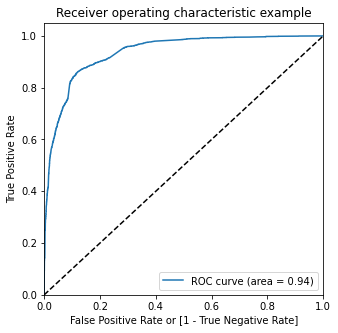

(array([0.        , 0.        , 0.        , ..., 0.99950025, 0.99975012,
        1.        ]),
 array([0.00000000e+00, 4.05515004e-04, 8.11030008e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99999284e+00, 9.99992837e-01, 9.99984942e-01, ...,
        3.19990648e-04, 2.83489692e-04, 2.56502976e-04]))

In [275]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [276]:
#The Area Under the ROC curve (AUC) is an aggregated metric that evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. It can range from 0.5 to 1, and the larger it is the better.
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [277]:
auc = auc_val(fpr,tpr)
auc

0.9361865600046684

### Step 10: Finding Optimal Cutoff Point - Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [278]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0         0.003271    1871          0    1    0    0    0    0   
1          0         0.434091    6795          0    1    1    1    1    1   
2          0         0.003993    3516          0    1    0    0    0    0   
3          0         0.121497    8105          0    1    1    0    0    0   
4          0         0.234223    3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [279]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.761596  0.975264  0.629935
0.2   0.2  0.803803  0.955799  0.710145
0.3   0.3  0.849258  0.889294  0.824588
0.4   0.4  0.872449  0.862530  0.878561
0.5   0.5  0.875232  0.832522  0.901549
0.6   0.6  0.853432  0.731549  0.928536
0.7   0.7  0.838126  0.648824  0.954773
0.8   0.8  0.818800  0.567721  0.973513
0.9   0.9  0.767007  0.409976  0.987006


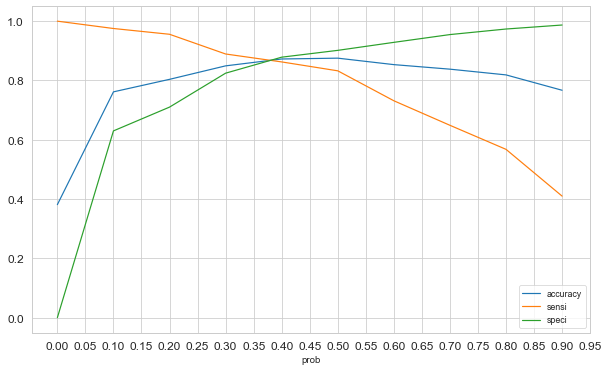

In [280]:
# Slightly alter the figure size to make it more horizontal.

#plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

##### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [281]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0         0.003271    1871          0    1    0    0    0    0   
1          0         0.434091    6795          0    1    1    1    1    1   
2          0         0.003993    3516          0    1    0    0    0    0   
3          0         0.121497    8105          0    1    1    0    0    0   
4          0         0.234223    3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                1  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

In [282]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8676561533704391

In [283]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3464,  538],
       [ 318, 2148]], dtype=int64)

In [284]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [285]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8710462287104623

In [286]:
# Let us calculate specificity
TN / float(TN+FP)

0.8655672163918041

In [287]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1344327836081959


In [288]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7997021593447505


In [289]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9159175039661555


### Step 11: Precision and Recall

In [290]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.7997021593447505

In [291]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.8710462287104623

In [292]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7997021593447505

In [293]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8710462287104623

In [294]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [295]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

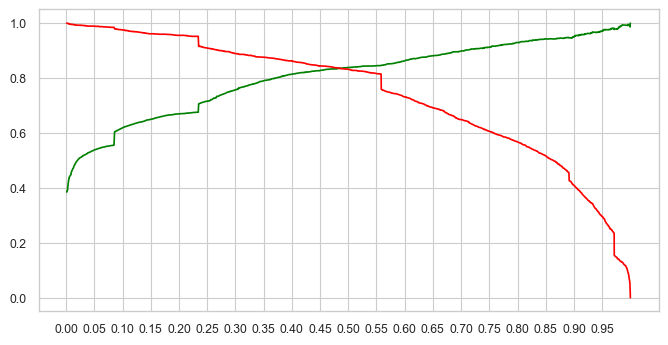

In [296]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

From the precision-recall graph above, we get the optical threshold value as close to .48. However our business requirement here is to have Lead Conversion Rate around 80%. This is already achieved with our earlier threshold value of 0.37. So we will stick to this value.

### Calculating the F1 score

##### F1 = 2×(Precision*Recall)/(Precision+Recall)

In [297]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8338509316770185

### Step 12: Making predictions on the test set

##### Using the scaler function from the train dataset to transfor the test dataset

In [298]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4269     0.856729                     0.964504              2.611381   
2376    -0.657764                    -0.885371             -1.088305   
7766     0.288795                    -0.777416              1.223999   
9199    -0.657764                    -0.885371             -1.088305   
4359    -0.657764                    -0.885371             -1.088305   

      Specialization_Business Administration  Specialization_E-Business  \
4269                                       0                          0   
2376                                       0                          0   
7766                                       0                          0   
9199                                       0                          0   
4359                                       0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
4269                          0                                  1   
2376                          0                                  1   
7766                          0                                  0   
9199                          0                                  1   
4359                          0                                  0   

      Specialization_Healthcare Management  \
4269                                     0   
2376                                     0   
7766                                     0   
9199                                     0   
4359                                     0   

      Specialization_Hospitality Management  \
4269                                      0   
2376                                      0   
7766                                      0   
9199                                      0   
4359                                      0   

      Specialization_Human Resource Management  ...  Tags_wrong number given  \
4269                                         0  ...                        0   
2376                                         0  ...                        0   
7766                                         0  ...                        0   
9199                                         0  ...                        0   
4359                                         0  ...                        0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
4269                        0                           0                   0   
2376                        0                           0                   0   
7766                        0                           0                   1   
9199                        0                           0                   0   
4359                        0                           0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
4269                       0                           0                   0   
2376                       0                           0                   0   
7766                       0                           0                   0   
9199                       1                           0                   0   
4359                       0                           0                   0   

      Lead Source_Reference  
4269                      0  
2376                      1  
7766                      0  
9199                      0  
4359                      1  

[5 rows x 62 columns]

In [299]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Last Activity_Email Bounced  \
4269                     0.964504                            0   
2376                    -0.885371                            0   
7766                    -0.777416                            0   
9199                    -0.885371                            0   
4359                    -0.885371                            0   

      Last Activity_Email Opened  Last Activity_Others  \
4269                           0                     0   
2376                           0                     0   
7766                           0                     1   
9199                           0                     0   
4359                           1                     0   

      Last Activity_SMS Sent  Tags_Busy  Tags_Closed by Horizzon  \
4269                       1          0                        0   
2376                       1          0                        0   
7766                       0          0                        0   
9199                       0          0                        0   
4359                       0          0                        0   

      Tags_Lost to EINS  Tags_Ringing  \
4269                  0             0   
2376                  0             0   
7766                  0             0   
9199                  0             0   
4359                  0             0   

      Tags_Will revert after reading the email  Tags_in touch with EINS  \
4269                                         1                        0   
2376                                         1                        0   
7766                                         1                        0   
9199                                         0                        0   
4359                                         1                        0   

      Tags_invalid number  Lead Origin_Lead Add Form  
4269                    0                          0  
2376                    0                          1  
7766                    0                          0  
9199                    0                          0  
4359                    0                          1

In [300]:
X_test_sm = sm.add_constant(X_test)

In [301]:
y_test_pred = res.predict(X_test_sm)

In [302]:
y_test_pred[:10]

4269    0.895009
2376    0.971283
7766    0.233796
9199    0.002667
4359    0.891124
9186    0.800538
1631    0.674343
8963    0.336564
8007    0.150812
5324    0.630950
dtype: float64

In [303]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [304]:
# Let's see the head
y_pred_1.head()

0
4269  0.895009
2376  0.971283
7766  0.233796
9199  0.002667
4359  0.891124

In [305]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [306]:
# Putting Lead ID to index
y_test_df['LeadID'] = y_test_df.index

In [307]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [308]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [309]:
y_pred_final.head()

Converted  LeadID         0
0          1    4269  0.895009
1          1    2376  0.971283
2          1    7766  0.233796
3          0    9199  0.002667
4          1    4359  0.891124

In [310]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [311]:
# Rearranging the columns
y_pred_final = y_pred_final.reset_index()

In [312]:
# Let's see the head of y_pred_final
y_pred_final.head()

index  Converted  LeadID  Conversion_Prob
0      0          1    4269         0.895009
1      1          1    2376         0.971283
2      2          1    7766         0.233796
3      3          0    9199         0.002667
4      4          1    4359         0.891124

In [313]:
y_pred_final.shape

(2772, 4)

##### Using the probability threshold value 0f 0.37 on the test dataset to predict if a lead will convert

In [314]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [315]:
y_pred_final.head()

index  Converted  LeadID  Conversion_Prob  final_predicted
0      0          1    4269         0.895009                1
1      1          1    2376         0.971283                1
2      2          1    7766         0.233796                0
3      3          0    9199         0.002667                0
4      4          1    4359         0.891124                1

In [316]:
# Let's check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.863997113997114

In [317]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1434  243]
 [ 134  961]]


In [318]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [319]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8776255707762557

In [320]:
# Let us calculate specificity
TN / float(TN+FP)

0.855098389982111

In [321]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1449016100178891


In [322]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7981727574750831


In [323]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9145408163265306


In [324]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.7981727574750831

In [325]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.8776255707762557

In [326]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.8360156589821661

In [327]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1677
           1       0.80      0.88      0.84      1095

    accuracy                           0.86      2772
   macro avg       0.86      0.87      0.86      2772
weighted avg       0.87      0.86      0.86      2772



##### Cross Validation Score


##### To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [328]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.78787879 0.81277056 0.83658009 0.83874459 0.84848485 0.8517316
 0.87121212 0.87229437 0.87662338 0.87987013]
0.8476190476190476


In [329]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

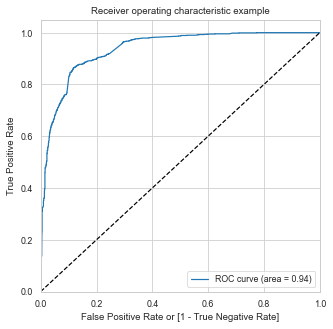

(array([0.        , 0.        , 0.        , ..., 0.99880739, 0.9994037 ,
        1.        ]),
 array([0.00000000e+00, 9.13242009e-04, 1.82648402e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99996832e+00, 9.99968318e-01, 9.99966661e-01, ...,
        4.14407347e-04, 3.86333204e-04, 3.19990648e-04]))

In [330]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

### Calculating the Area Under the Curve

In [331]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [332]:
auc = auc_val(fpr,tpr)
auc

0.9367137446462042

###### As a rule of thumb, an AUC can be classed as follows,

* 0.90 - 1.00 = excellent
* 0.80 - 0.90 = good
* 0.70 - 0.80 = fair
* 0.60 - 0.70 = poor
* 0.50 - 0.60 = fail

Since we got a value of 0.9367, our model seems to be doing well on the test dataset.

### Step 13: Calculating Lead score for the entire dataset

#### Lead Score = 100 * ConversionProbability

##### This needs to be calculated for all the leads from the original dataset (train + test)

In [333]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

index  Converted  LeadID  Conversion_Prob  final_predicted
0      0          1    4269         0.895009                1
1      1          1    2376         0.971283                1
2      2          1    7766         0.233796                0
3      3          0    9199         0.002667                0
4      4          1    4359         0.891124                1

In [334]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

Converted  Conversion_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0         0.003271    1871          0    1    0    0    0    0   
1          0         0.434091    6795          0    1    1    1    1    1   
2          0         0.003993    3516          0    1    0    0    0    0   
3          0         0.121497    8105          0    1    1    0    0    0   
4          0         0.234223    3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                1  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

In [335]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

LeadID  Converted  Conversion_Prob  final_predicted
0    1871          0         0.003271                0
1    6795          0         0.434091                1
2    3516          0         0.003993                0
3    8105          0         0.121497                0
4    3934          0         0.234223                0

#### Concatenating the train and the test dataset with the Conversion Probabilities

In [336]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

LeadID  Converted  Conversion_Prob  final_predicted  index
0    1871          0         0.003271                0    NaN
1    6795          0         0.434091                1    NaN
2    3516          0         0.003993                0    NaN
3    8105          0         0.121497                0    NaN
4    3934          0         0.234223                0    NaN

In [337]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6468, 4)
(2772, 5)
(9240, 5)


In [338]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

9240

In [339]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

LeadID  Converted  Conversion_Prob  final_predicted  index  Lead_Score
0    1871          0         0.003271                0    NaN           0
1    6795          0         0.434091                1    NaN          43
2    3516          0         0.003993                0    NaN           0
3    8105          0         0.121497                0    NaN          12
4    3934          0         0.234223                0    NaN          23

In [340]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [341]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

Converted  Conversion_Prob  final_predicted   index  Lead_Score
LeadID                                                                 
0               0         0.002667                0  2289.0           0
1               0         0.011579                0     NaN           1
2               1         0.846545                1     NaN          85
3               0         0.005182                0  1947.0           1
4               1         0.578913                1     NaN          58

In [342]:
# Slicing the Lead Number column from original_leads dataframe
data = data_processed[['Lead Number']]
data_processed.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page Views Per Visit  Specialization_Business Administration  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Specialization_E-Business  Specialization_E-COMMERCE  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Specialization_Finance Management  Specialization_Healthcare Management  \
0                                  1                                     0   
1                                  1                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  1                                     0   

   ...  Tags_wrong number given  Lead Origin_Landing Page Submission  \
0  ...                        0                                    0   
1  ...                        0                                    0   
2  ...                        0                                    1   
3  ...                        0                                    1   
4  ...                        0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Google  Lead Source_Olark Chat  \
0                           0                   0                       1   
1                           0                   0                       0   
2                           0                   0                       0   
3                           0                   0                       0   
4                           0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  
0                           0                   0                      0  
1                           1                   0                      0  
2                           0                   0                      0  
3                           0                   0                      0  
4                           0                   0                      0  

[5 rows x 64 columns]

#### Concatenating the 2 dataframes based on index.
#### This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [344]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([data_processed, lead_full_pred], axis=1)
leads_with_score.head(10)

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   
5       660680          0          0.0                            0   
6       660673          1          2.0                         1640   
7       660664          0          0.0                            0   
8       660624          0          2.0                           71   
9       660616          0          4.0                           58   

   Page Views Per Visit  Specialization_Business Administration  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   
5                   0.0                                       0   
6                   2.0                                       0   
7                   0.0                                       0   
8                   2.0                                       0   
9                   4.0                                       0   

   Specialization_E-Business  Specialization_E-COMMERCE  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
5                          0                          0   
6                          0                          0   
7                          0                          0   
8                          0                          0   
9                          0                          0   

   Specialization_Finance Management  Specialization_Healthcare Management  \
0                                  1                                     0   
1                                  1                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  1                                     0   
5                                  1                                     0   
6                                  0                                     0   
7                                  1                                     0   
8                                  0                                     0   
9                                  1                                     0   

   ...  Lead Source_Google  Lead Source_Olark Chat  \
0  ...                   0                       1   
1  ...                   0                       0   
2  ...                   0                       0   
3  ...                   0                       0   
4  ...                   1                       0   
5  ...                   0                       1   
6  ...                   1                       0   
7  ...                   0                       1   
8  ...                   0                       0   
9  ...                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   

In [345]:
# Inspecting the dataframe shape
leads_with_score.shape

(9240, 69)

In [346]:
# Inspecting if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

Total  Percentage
index                                      6468        70.0
Lead Number                                   0         0.0
Tags_Ringing                                  0         0.0
Tags_in touch with EINS                       0         0.0
Tags_Will revert after reading the email      0         0.0
...                                         ...         ...
Last Activity_SMS Sent                        0         0.0
Tags_Busy                                     0         0.0
Tags_Closed by Horizzon                       0         0.0
Tags_Diploma holder (Not Eligible)            0         0.0
Lead_Score                                    0         0.0

[69 rows x 2 columns]

### Step 14: Determining Feature Importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [348]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                 1.03
Last Activity_Email Bounced                -1.13
Last Activity_Email Opened                  1.19
Last Activity_Others                        1.08
Last Activity_SMS Sent                      2.61
Tags_Busy                                   2.91
Tags_Closed by Horizzon                     8.62
Tags_Lost to EINS                           7.99
Tags_Ringing                               -0.99
Tags_Will revert after reading the email    3.55
Tags_in touch with EINS                     2.90
Tags_invalid number                        -1.24
Lead Origin_Lead Add Form                   3.29
dtype: float64

##### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [349]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                 11.97
Last Activity_Email Bounced                -13.16
Last Activity_Email Opened                  13.84
Last Activity_Others                        12.52
Last Activity_SMS Sent                      30.31
Tags_Busy                                   33.76
Tags_Closed by Horizzon                    100.00
Tags_Lost to EINS                           92.76
Tags_Ringing                               -11.47
Tags_Will revert after reading the email    41.15
Tags_in touch with EINS                     33.60
Tags_invalid number                        -14.41
Lead Origin_Lead Add Form                   38.14
dtype: float64

##### Sorting the feature variables based on their relative coefficient values

In [350]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx
##

Total Time Spent on Website                 11
Last Activity_Email Bounced                  1
Last Activity_Email Opened                   8
Last Activity_Others                         0
Last Activity_SMS Sent                       3
Tags_Busy                                    2
Tags_Closed by Horizzon                      4
Tags_Lost to EINS                           10
Tags_Ringing                                 5
Tags_Will revert after reading the email    12
Tags_in touch with EINS                      9
Tags_invalid number                          7
Lead Origin_Lead Add Form                    6
dtype: int64

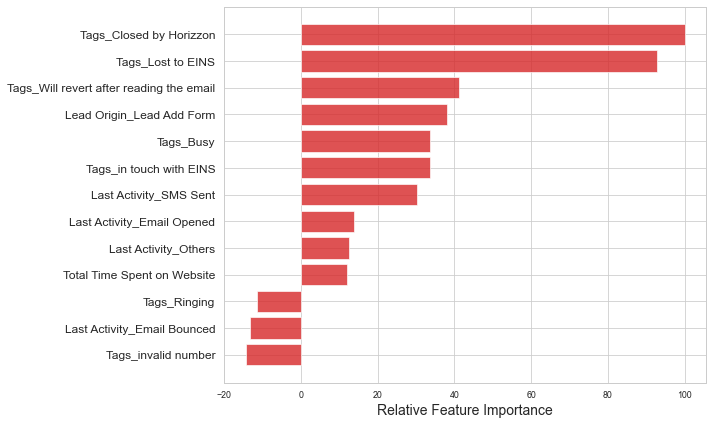

In [351]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

## Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [352]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
6                   Tags_Closed by Horizzon 100.00
7                         Tags_Lost to EINS  92.76
9  Tags_Will revert after reading the email  41.15

# Step 15: Conclusion

### After trying several models, we finally chose a model with the following characteristics:

All variables have p-value < `0.05`.
All the features have very low VIF values, meaning, there is `hardly any muliticollinearity` among the features. This is also evident from the heat map.
The overall accuracy of `0.8776` at a probability threshold of 0.37 on the test dataset is also very acceptable.
    

#### The conversion probability of a lead increases with increase in values of the following features in descending order:

|Features with Positive Coefficient Values|
|-------------|
|Tags_Closed by Horizzon|
|Tags_Lost to EINS|
|Tags_Will revert after reading the email|
|Lead Origin_Lead Add Form|
|Tags_Busy|
|Tags_in touch with EINS|
|Last Activity_SMS Sent|
|Last Activity_Email Opened|
|Last Activity_Others|
|Total Time Spent on Website|

#### The conversion probability of a lead increases with decrease in values of the following features in descending order:

|Features with Negative Coefficient Values|
|----------|
|Tags_Ringing|
|Last Activity_Email Bounced|
|Tags_invalid number|